# Import datasets

In [1]:
import numpy as np
import pandas as pd
import pickle

def load_dataset(dsname):
    metadata = pd.read_csv(f"/datasets/nicolas_facchinetti/processed_data/{dsname}/metadata_final.csv")
    x = pickle.load(open(f"/datasets/nicolas_facchinetti/processed_data/{dsname}/processed_data0.p", "rb" ))
    y = pickle.load(open(f"/datasets/nicolas_facchinetti/processed_data/{dsname}/processed_labels.p", "rb" ))
    return metadata, x, y

In [2]:
from sklearn.preprocessing import StandardScaler
def standardize(data):
    scaler = StandardScaler()
    n = data.shape
    return scaler.fit_transform(data.reshape(n[0],-1)).reshape(n)

In [3]:
datasets = ["emovo", 'emodb', "ravdess"]
data = {}
for d in datasets:
    md, x, y = load_dataset(d)
    data[d] = {}
    data[d]["x"] = standardize(x)
    data[d]["y"] = y
    data[d]["metadata"] = md

In [4]:
data['emodb']['x'][0]

array([[[1.0508965 ],
        [0.45340493],
        [0.90310585],
        ...,
        [1.1159189 ],
        [1.1121945 ],
        [1.1117905 ]],

       [[0.6955967 ],
        [0.16441736],
        [0.40496677],
        ...,
        [1.1087862 ],
        [1.1082361 ],
        [1.1074913 ]],

       [[0.60865915],
        [0.01374029],
        [0.2268114 ],
        ...,
        [1.0928285 ],
        [1.1059525 ],
        [1.1100743 ]],

       ...,

       [[0.8017341 ],
        [0.97662485],
        [0.31735677],
        ...,
        [1.0694526 ],
        [1.091225  ],
        [1.1004032 ]],

       [[0.8094617 ],
        [0.98400015],
        [0.30769482],
        ...,
        [1.0719686 ],
        [1.0963826 ],
        [1.1034008 ]],

       [[0.79332876],
        [1.2878755 ],
        [0.30874625],
        ...,
        [1.0751833 ],
        [1.0952688 ],
        [1.1052506 ]]], dtype=float32)

# Define architectures

In [5]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.layers import LeakyReLU, Conv2D, Flatten, Dense, Dropout, MaxPooling2D, LSTM, TimeDistributed, InputLayer, Reshape, BatchNormalization, Bidirectional

2022-12-20 13:46:21.685698: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Search the best architecture

In [6]:

def get_m():
    m = Sequential([
            InputLayer(input_shape=(261,128,1)),
            Reshape((9,29,128,1)),
            TimeDistributed(Conv2D(16, kernel_size=(5,5))),
            TimeDistributed(LeakyReLU(alpha=0.2)),
        
            TimeDistributed(BatchNormalization()),
            TimeDistributed(MaxPooling2D(pool_size=(4,4), strides=2)),

            TimeDistributed(Conv2D(32, kernel_size=(3,3))),
            TimeDistributed(LeakyReLU(alpha=0.2)),
        
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),
            TimeDistributed(Conv2D(64, kernel_size=(3,3))),
            TimeDistributed(LeakyReLU(alpha=0.2)),
        
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),
            TimeDistributed(Flatten()),
            
            LSTM(3, return_sequences=False, dropout=0.2),
            Dense(5, activation='softmax')
                            ])
    return m

get_m().summary()

2022-12-20 13:46:35.421005: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-12-20 13:46:35.422080: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-12-20 13:46:35.515433: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:15:00.0 name: NVIDIA TITAN V computeCapability: 7.0
coreClock: 1.455GHz coreCount: 80 deviceMemorySize: 11.77GiB deviceMemoryBandwidth: 607.97GiB/s
2022-12-20 13:46:35.515485: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-12-20 13:46:35.517552: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-12-20 13:46:35.517647: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 9, 29, 128, 1)     0         
_________________________________________________________________
time_distributed (TimeDistri (None, 9, 25, 124, 16)    416       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 9, 25, 124, 16)    0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 9, 25, 124, 16)    64        
_________________________________________________________________
time_distributed_3 (TimeDist (None, 9, 11, 61, 16)     0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 9, 9, 59, 32)      4640      
_________________________________________________________________
time_distributed_5 (TimeDist (None, 9, 9, 59, 32)      0

In [8]:

def get_m1():
    m = Sequential([
            InputLayer(input_shape=(261,128,1)),
            Reshape((9,29,128,1)),
            TimeDistributed(Conv2D(16, kernel_size=(5,5))),
            TimeDistributed(LeakyReLU(alpha=0.2)),
            TimeDistributed(BatchNormalization()),
            TimeDistributed(MaxPooling2D(pool_size=(4,4), strides=2)),

            TimeDistributed(Conv2D(32, kernel_size=(3,3))),
            TimeDistributed(LeakyReLU(alpha=0.2)),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),

            TimeDistributed(Conv2D(64, kernel_size=(3,3))),
            TimeDistributed(LeakyReLU(alpha=0.2)),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),
            TimeDistributed(Flatten()),

            Bidirectional(LSTM(3, dropout=0.2, return_sequences=False)),
            Dense(5, activation='softmax')
    ])
    return m

get_m1().summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 9, 29, 128, 1)     0         
_________________________________________________________________
time_distributed_11 (TimeDis (None, 9, 25, 124, 16)    416       
_________________________________________________________________
time_distributed_12 (TimeDis (None, 9, 25, 124, 16)    0         
_________________________________________________________________
time_distributed_13 (TimeDis (None, 9, 25, 124, 16)    64        
_________________________________________________________________
time_distributed_14 (TimeDis (None, 9, 11, 61, 16)     0         
_________________________________________________________________
time_distributed_15 (TimeDis (None, 9, 9, 59, 32)      4640      
_________________________________________________________________
time_distributed_16 (TimeDis (None, 9, 9, 59, 32)     

In [9]:
def get_m2():
    m = Sequential([
            InputLayer(input_shape=(261,128,1)),
            Reshape((9,29,128,1)),
            TimeDistributed(Conv2D(16, kernel_size=(5,5))),
            TimeDistributed(LeakyReLU(alpha=0.2)),
            TimeDistributed(BatchNormalization()),
            TimeDistributed(MaxPooling2D(pool_size=(4,4), strides=2)),
            TimeDistributed(Conv2D(32, kernel_size=(3,3))),
            TimeDistributed(LeakyReLU(alpha=0.2)),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),
            TimeDistributed(Conv2D(64, kernel_size=(3,3))),
            TimeDistributed(LeakyReLU(alpha=0.2)),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),
            TimeDistributed(Flatten()),
            
            LSTM(6, return_sequences=False, dropout=0.2),
            Dense(5, activation='softmax')
        ])
    return m

get_m2().summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 9, 29, 128, 1)     0         
_________________________________________________________________
time_distributed_22 (TimeDis (None, 9, 25, 124, 16)    416       
_________________________________________________________________
time_distributed_23 (TimeDis (None, 9, 25, 124, 16)    0         
_________________________________________________________________
time_distributed_24 (TimeDis (None, 9, 25, 124, 16)    64        
_________________________________________________________________
time_distributed_25 (TimeDis (None, 9, 11, 61, 16)     0         
_________________________________________________________________
time_distributed_26 (TimeDis (None, 9, 9, 59, 32)      4640      
_________________________________________________________________
time_distributed_27 (TimeDis (None, 9, 9, 59, 32)     

In [10]:
def get_m3():
    m = Sequential([
            InputLayer(input_shape=(261,128,1)),
            Reshape((9,29,128,1)),
            TimeDistributed(Conv2D(16, kernel_size=(3,3))),
            TimeDistributed(LeakyReLU(alpha=0.2)),
            TimeDistributed(BatchNormalization()),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),

            TimeDistributed(Conv2D(32, kernel_size=(3,3))),
            TimeDistributed(LeakyReLU(alpha=0.2)),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),
            TimeDistributed(Conv2D(64, kernel_size=(3,3))),
            TimeDistributed(LeakyReLU(alpha=0.2)),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),
            TimeDistributed(Flatten()),
            
            LSTM(3, return_sequences=False, dropout=0.2),
            Dense(5, activation='softmax')
    ])
    return m

get_m3().summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 9, 29, 128, 1)     0         
_________________________________________________________________
time_distributed_33 (TimeDis (None, 9, 27, 126, 16)    160       
_________________________________________________________________
time_distributed_34 (TimeDis (None, 9, 27, 126, 16)    0         
_________________________________________________________________
time_distributed_35 (TimeDis (None, 9, 27, 126, 16)    64        
_________________________________________________________________
time_distributed_36 (TimeDis (None, 9, 13, 63, 16)     0         
_________________________________________________________________
time_distributed_37 (TimeDis (None, 9, 11, 61, 32)     4640      
_________________________________________________________________
time_distributed_38 (TimeDis (None, 9, 11, 61, 32)    

In [11]:
def get_m4():
    m = Sequential([
            InputLayer(input_shape=(261,128,1)),
            Reshape((9,29,128,1)),
            TimeDistributed(Conv2D(16, kernel_size=(5,5))),
            TimeDistributed(LeakyReLU(alpha=0.2)),
            TimeDistributed(BatchNormalization()),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),

            TimeDistributed(Conv2D(32, kernel_size=(3,3))),
            TimeDistributed(LeakyReLU(alpha=0.2)),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),
            TimeDistributed(Conv2D(64, kernel_size=(3,3))),
            TimeDistributed(LeakyReLU(alpha=0.2)),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),
            TimeDistributed(Flatten()),
            
            LSTM(6, return_sequences=False, dropout=0.2),
            Dense(5, activation='softmax')
    ])
    return m

get_m4().summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 9, 29, 128, 1)     0         
_________________________________________________________________
time_distributed_44 (TimeDis (None, 9, 25, 124, 16)    416       
_________________________________________________________________
time_distributed_45 (TimeDis (None, 9, 25, 124, 16)    0         
_________________________________________________________________
time_distributed_46 (TimeDis (None, 9, 25, 124, 16)    64        
_________________________________________________________________
time_distributed_47 (TimeDis (None, 9, 12, 62, 16)     0         
_________________________________________________________________
time_distributed_48 (TimeDis (None, 9, 10, 60, 32)     4640      
_________________________________________________________________
time_distributed_49 (TimeDis (None, 9, 10, 60, 32)    

In [12]:
def get_m5():
    m = Sequential([
            InputLayer(input_shape=(261,128,1)),
            Reshape((9,29,128,1)),
            TimeDistributed(Conv2D(32, kernel_size=(5,5))),
            TimeDistributed(LeakyReLU(alpha=0.2)),
            TimeDistributed(BatchNormalization()),
            TimeDistributed(MaxPooling2D(pool_size=(4,4), strides=2)),

            TimeDistributed(Conv2D(64, kernel_size=(3,3))),
            TimeDistributed(LeakyReLU(alpha=0.2)),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),
            TimeDistributed(Conv2D(128, kernel_size=(3,3))),
            TimeDistributed(LeakyReLU(alpha=0.2)),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),
            TimeDistributed(Flatten()),
            
            LSTM(3, return_sequences=False, dropout=0.2),
            Dense(5, activation='softmax')
    ])
    return m

get_m5().summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 9, 29, 128, 1)     0         
_________________________________________________________________
time_distributed_55 (TimeDis (None, 9, 25, 124, 32)    832       
_________________________________________________________________
time_distributed_56 (TimeDis (None, 9, 25, 124, 32)    0         
_________________________________________________________________
time_distributed_57 (TimeDis (None, 9, 25, 124, 32)    128       
_________________________________________________________________
time_distributed_58 (TimeDis (None, 9, 11, 61, 32)     0         
_________________________________________________________________
time_distributed_59 (TimeDis (None, 9, 9, 59, 64)      18496     
_________________________________________________________________
time_distributed_60 (TimeDis (None, 9, 9, 59, 64)     

In [13]:
def get_m6():
    m = Sequential([
            InputLayer(input_shape=(261,128,1)),
            Reshape((9,29,128,1)),
            TimeDistributed(Conv2D(16, kernel_size=(5,5))),
            TimeDistributed(LeakyReLU(alpha=0.2)),
            TimeDistributed(BatchNormalization()),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),

            TimeDistributed(Conv2D(32, kernel_size=(5,5))),
            TimeDistributed(LeakyReLU(alpha=0.2)),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),

            TimeDistributed(Conv2D(64, kernel_size=(3,3))),
            TimeDistributed(LeakyReLU(alpha=0.2)),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),
        
            TimeDistributed(Conv2D(128, kernel_size=(3,3))),
            TimeDistributed(LeakyReLU(alpha=0.2)),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),
            TimeDistributed(Flatten()),

            LSTM(3, dropout=0.2, return_sequences=False),
            Dense(5, activation='softmax')
    ])
    return m

get_m6().summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 9, 29, 128, 1)     0         
_________________________________________________________________
time_distributed_66 (TimeDis (None, 9, 25, 124, 16)    416       
_________________________________________________________________
time_distributed_67 (TimeDis (None, 9, 25, 124, 16)    0         
_________________________________________________________________
time_distributed_68 (TimeDis (None, 9, 25, 124, 16)    64        
_________________________________________________________________
time_distributed_69 (TimeDis (None, 9, 12, 62, 16)     0         
_________________________________________________________________
time_distributed_70 (TimeDis (None, 9, 8, 58, 32)      12832     
_________________________________________________________________
time_distributed_71 (TimeDis (None, 9, 8, 58, 32)     

In [14]:
archs = [get_m, get_m1, get_m2, get_m3, get_m4, get_m5, get_m6]

# Search best architecturs for all datasets

In [17]:
def train_evaluate(model_fn, train, val, test, opt='adam'):
    m = model_fn()
    m.compile(loss='categorical_crossentropy', optimizer=opt, metrics='accuracy')
    
    earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min', restore_best_weights=True)
    reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=6, verbose=0, min_delta=1e-4, mode='min')

    # fit & predict
    history = m.fit(train[0], train[1],
                    epochs=50,
                    batch_size=32,
                    callbacks=[earlyStopping, reduce_lr_loss],
                    validation_data=(val[0], val[1]),
                    verbose=0)
    # test
    results = m.evaluate(test[0], test[1], batch_size=32)
    print("\t\tTest loss, test acc:", results)
    return history, results

In [16]:
from sklearn.model_selection import train_test_split

def train_test_kfold(model_fn, x, y, metadata, n=[1997,1941,1965]):    
    results = []
    
    train_df, test_df = train_test_split(metadata, 
                                   test_size = 0.1, 
                                   random_state = 2022,
                                   stratify = metadata['label'])
    test_index = test_df.index
    x_test = x[test_index]
    y_test = y[test_index]
    for num, rs in enumerate(n):
        trainK_df, val_df = train_test_split(train_df, 
                                   test_size = 0.15, 
                                   random_state = rs,
                                   stratify = train_df['label'])
        train_index = trainK_df.index
        val_index = val_df.index
        x_train = x[train_index]
        y_train = y[train_index]
        x_val = x[val_index]
        y_val = y[val_index]
        
        print(f"\t\tFold {num+1}")
        results.append(train_evaluate(model_fn, (x_train, y_train), (x_val, y_val), (x_test, y_test)))
    return results

In [18]:
from sklearn.model_selection import cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

results_arch = {}
for count, a in enumerate(archs):
    print(f'Architecture {count} of {len(archs)-1}')
    results_arch[f"m{count}"] = {}
    for d in data:
        print(f"\tTraining on {d}")
        x = data[d]["x"]
        y = data[d]["y"]
        metadata = data[d]["metadata"]
        res = train_test_kfold(a, x, y, metadata)
        results_arch[f"m{count}"][d] = res

Architecture 0 of 6
	Training on emovo
		Fold 1


2022-12-20 13:47:40.314798: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-12-20 13:47:40.329714: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3301490000 Hz
2022-12-20 13:47:41.520758: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-12-20 13:47:41.688440: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


16/16 [==============================] - 0s 7ms/step - loss: 1.5049 - accuracy: 0.3077
		Test loss, test acc: [1.5048655271530151, 0.3076923191547394]
		Fold 2
16/16 [==============================] - 0s 5ms/step - loss: 1.4346 - accuracy: 0.3381
		Test loss, test acc: [1.4345515966415405, 0.33805668354034424]
		Fold 3
16/16 [==============================] - 0s 6ms/step - loss: 1.2342 - accuracy: 0.4777
		Test loss, test acc: [1.2342379093170166, 0.4777328073978424]
	Training on emodb
		Fold 1
12/12 [==============================] - 0s 7ms/step - loss: 0.8752 - accuracy: 0.6587
		Test loss, test acc: [0.875194251537323, 0.6586666703224182]
		Fold 2
12/12 [==============================] - 0s 6ms/step - loss: 1.3516 - accuracy: 0.4160
		Test loss, test acc: [1.3515981435775757, 0.41600000858306885]
		Fold 3
12/12 [==============================] - 0s 6ms/step - loss: 0.8644 - accuracy: 0.7067
		Test loss, test acc: [0.8643868565559387, 0.7066666483879089]
	Training on ravdess
		Fold 1

		Fold 2
12/12 [==============================] - 0s 9ms/step - loss: 1.3692 - accuracy: 0.4267
		Test loss, test acc: [1.3691598176956177, 0.4266666769981384]
		Fold 3
12/12 [==============================] - 0s 9ms/step - loss: 1.3181 - accuracy: 0.4587
		Test loss, test acc: [1.3181394338607788, 0.4586666524410248]
	Training on ravdess
		Fold 1
28/28 [==============================] - 0s 7ms/step - loss: 1.5502 - accuracy: 0.2980
		Test loss, test acc: [1.5502406358718872, 0.2979910671710968]
		Fold 2
28/28 [==============================] - 1s 7ms/step - loss: 1.6092 - accuracy: 0.2065
		Test loss, test acc: [1.6092262268066406, 0.2064732164144516]
		Fold 3
28/28 [==============================] - 0s 7ms/step - loss: 1.6092 - accuracy: 0.2065
		Test loss, test acc: [1.6092252731323242, 0.2064732164144516]
Architecture 6 of 6
	Training on emovo
		Fold 1
16/16 [==============================] - 0s 10ms/step - loss: 1.5790 - accuracy: 0.2389
		Test loss, test acc: [1.5789709091186523,

In [22]:
res = []

for s in results_arch:
    print(s)
    means = []
    for d in results_arch[s]:
        print(d)
        m = np.mean([p[1][1] for p in results_arch[s][d]])
        print(m)
        means.append(m)
    means.append(np.mean(means))
    res.append(means)
    print()

m0
emovo
0.374493936697642
emodb
0.5937777757644653
ravdess
0.4222470323244731

m1
emovo
0.6794871886571249
emodb
0.8088888923327128
ravdess
0.6395089228947958

m2
emovo
0.595816453297933
emodb
0.7173333366711935
ravdess
0.5874255994955698

m3
emovo
0.3056680162747701
emodb
0.5875555475552877
ravdess
0.3690476218859355

m4
emovo
0.36302293837070465
emodb
0.6924444437026978
ravdess
0.4386160572369893

m5
emovo
0.23616734643777212
emodb
0.4595555563767751
ravdess
0.23697916666666666

m6
emovo
0.22537112732728323
emodb
0.23466666042804718
ravdess
0.22991071144739786



In [25]:
pd.DataFrame(res, columns=['emovo', 'emodb', 'ravdess', 'mean'], index=['m0', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6'])

emovo     emodb   ravdess      mean
m0  0.374494  0.593778  0.422247  0.463506
m1  0.679487  0.808889  0.639509  0.709295
m2  0.595816  0.717333  0.587426  0.633525
m3  0.305668  0.587556  0.369048  0.420757
m4  0.363023  0.692444  0.438616  0.498028
m5  0.236167  0.459556  0.236979  0.310901
m6  0.225371  0.234667  0.229911  0.229983

In [20]:
import matplotlib.pyplot as plt

def plot_res_acc(h, x, y):
    plt.subplot(x, 2, y)
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
def plot_res_loss(h, x, y):
    plt.subplot(x, 2, y)
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
def plot_stats(h):
    fig = plt.gcf()
    fig.set_size_inches(15, 15)
    for num, c in enumerate(h):
        n = (num+1)*2
        plot_res_acc(c, len(h), n-1)
        plot_res_loss(c, len(h), n)
    plt.show()

m0
emovo


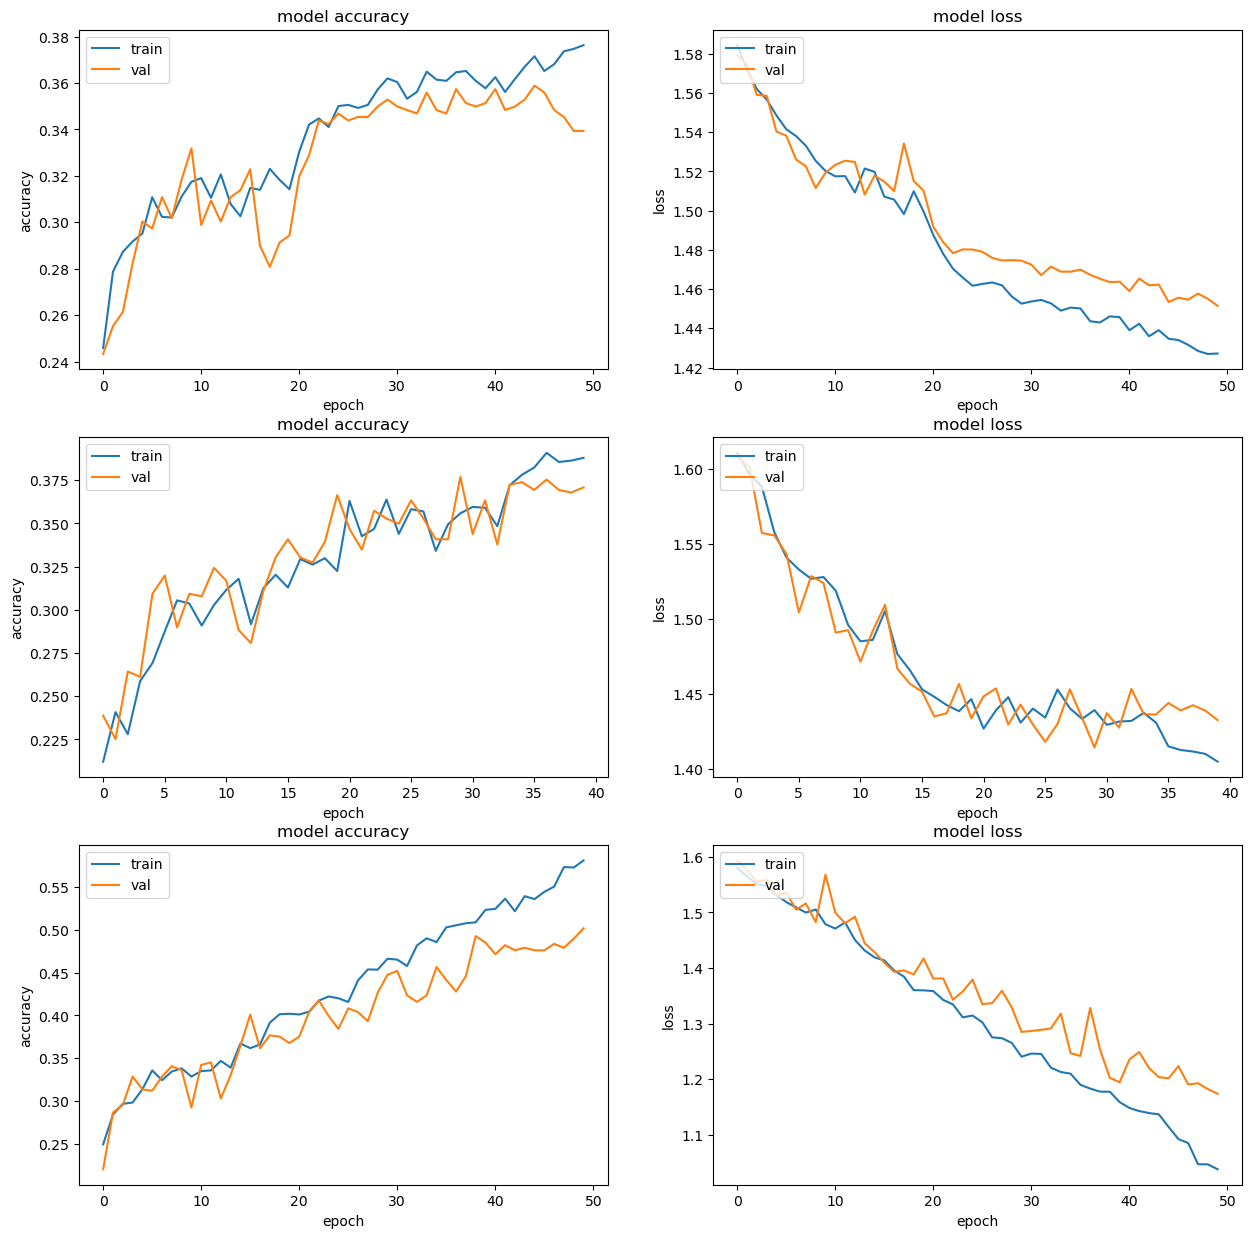

emodb


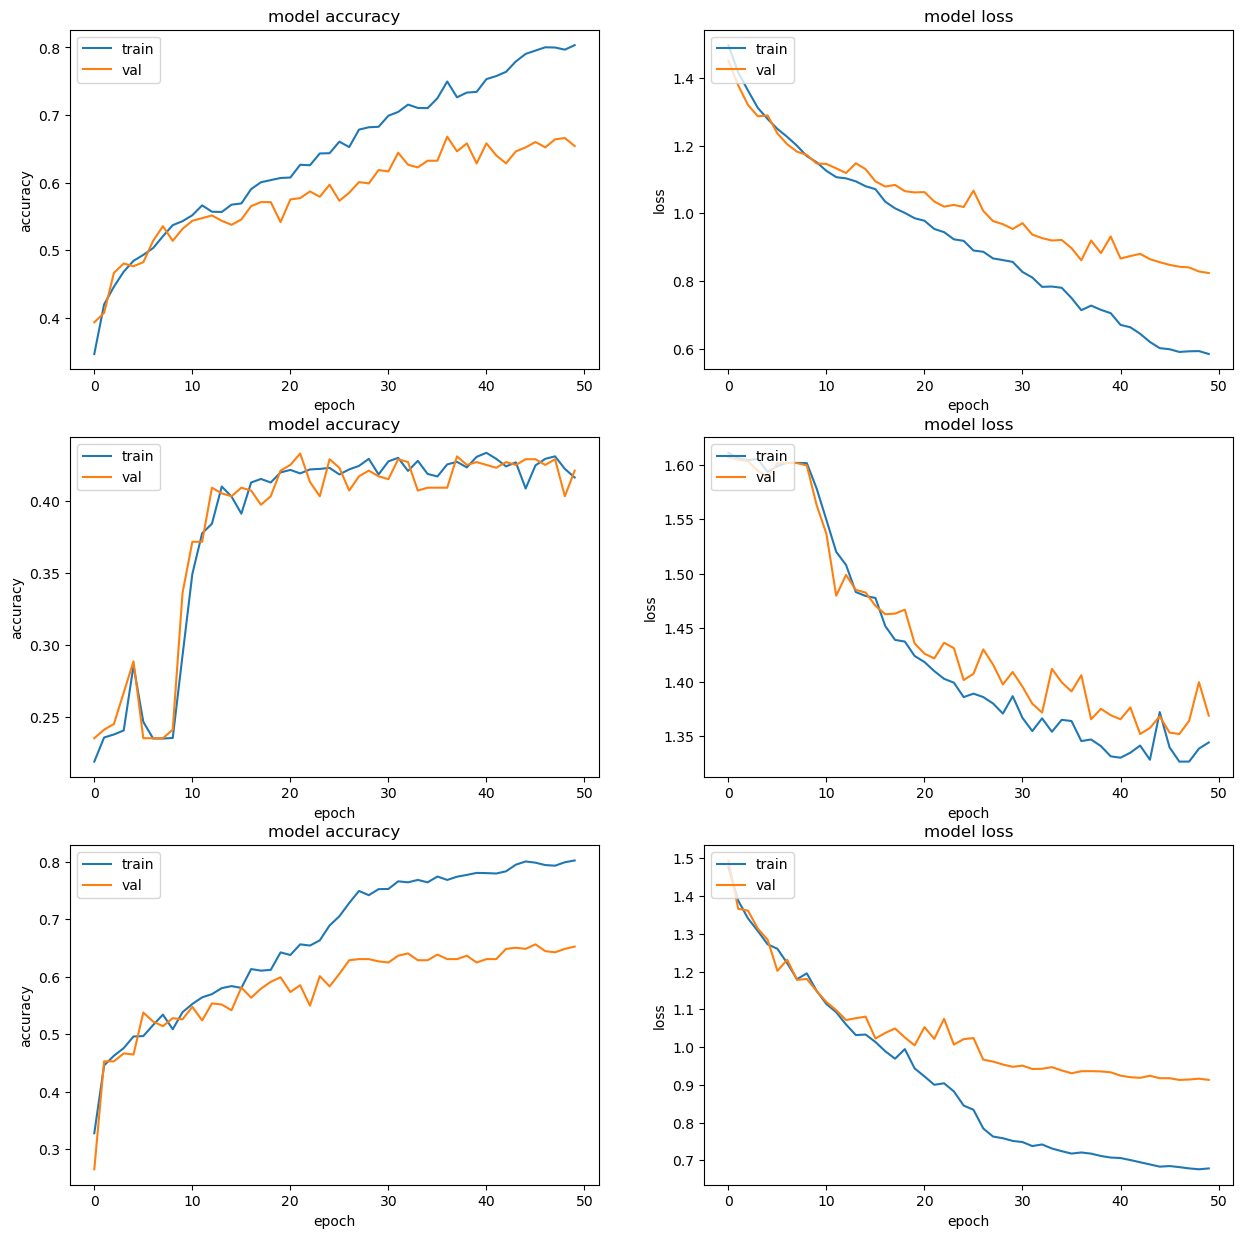

ravdess


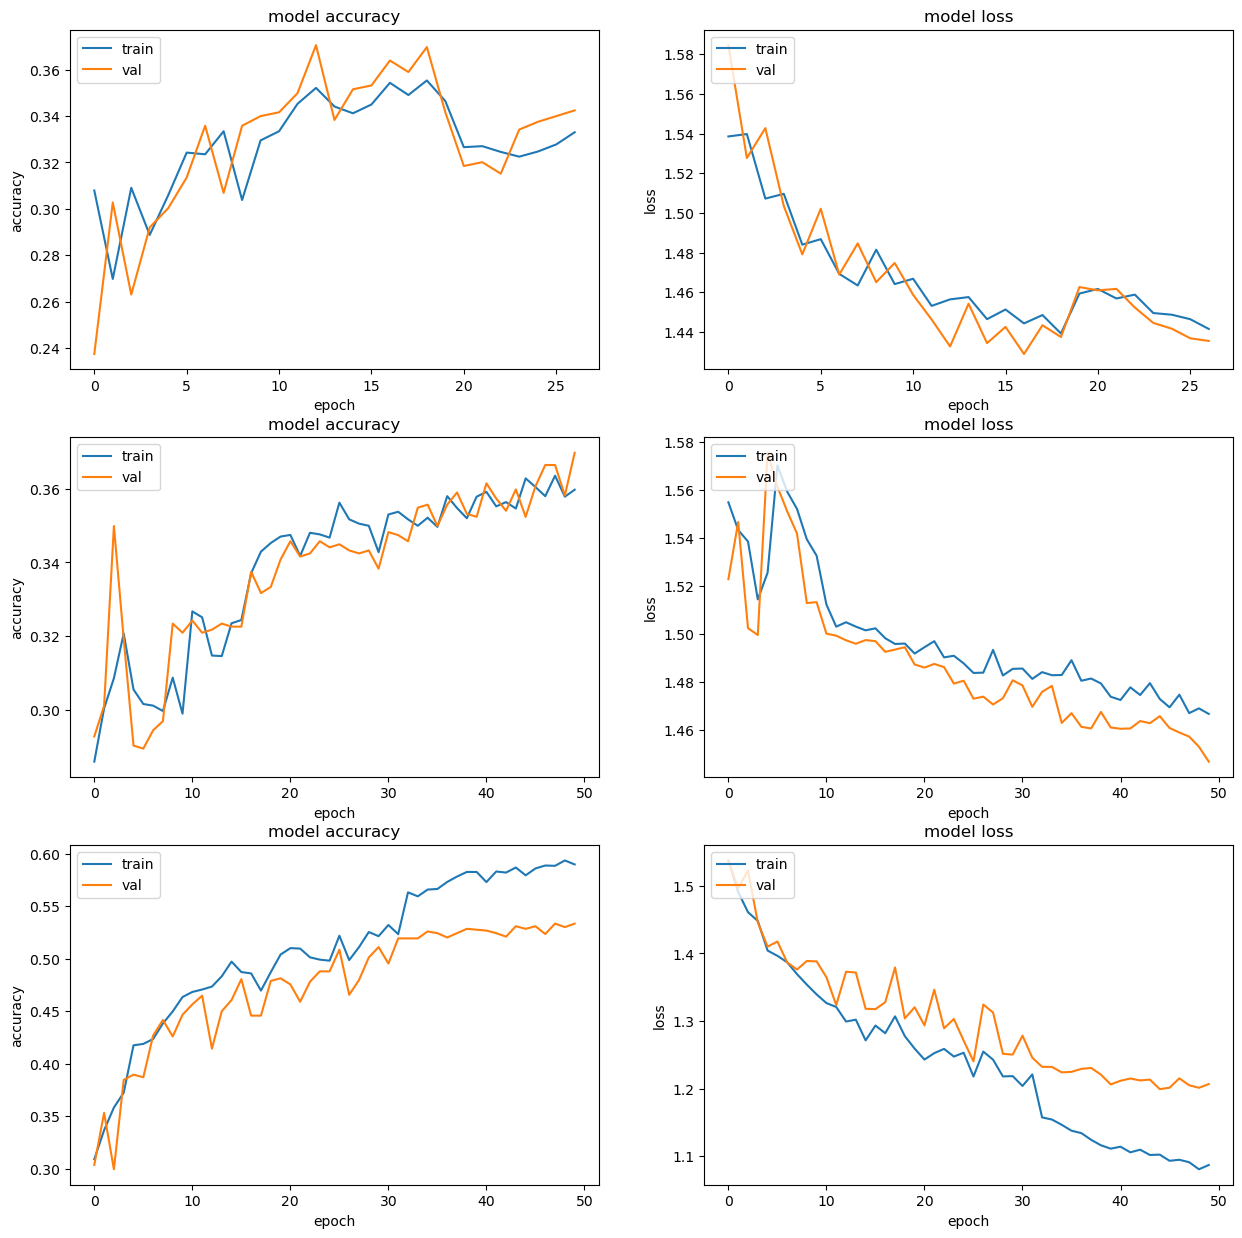


m1
emovo


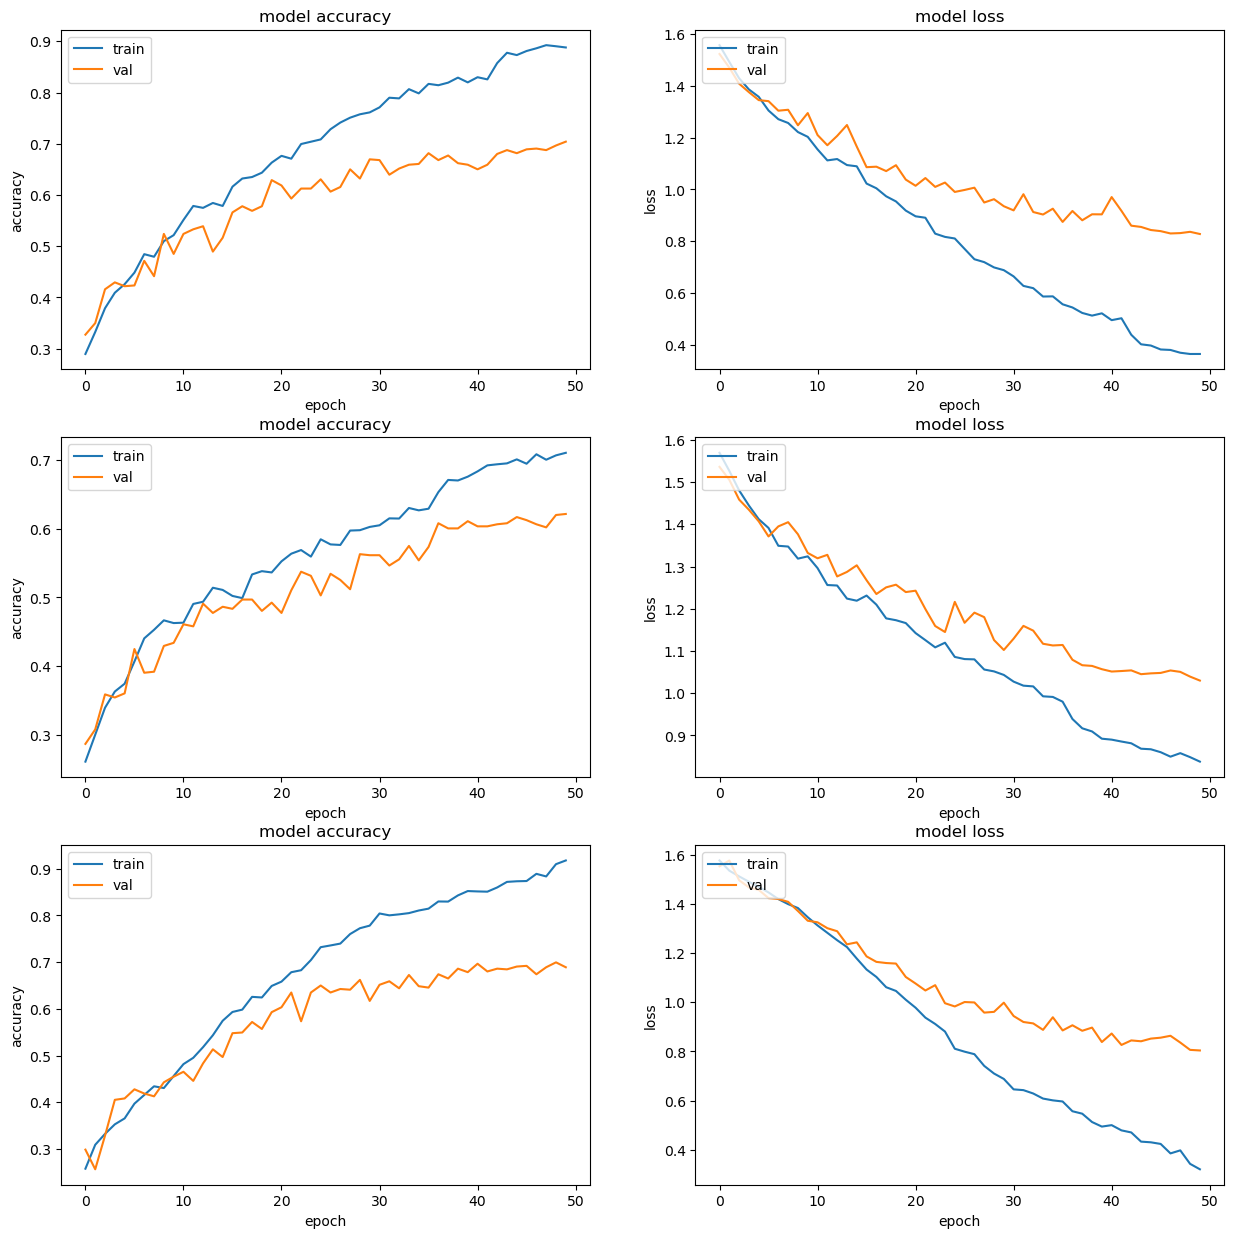

emodb


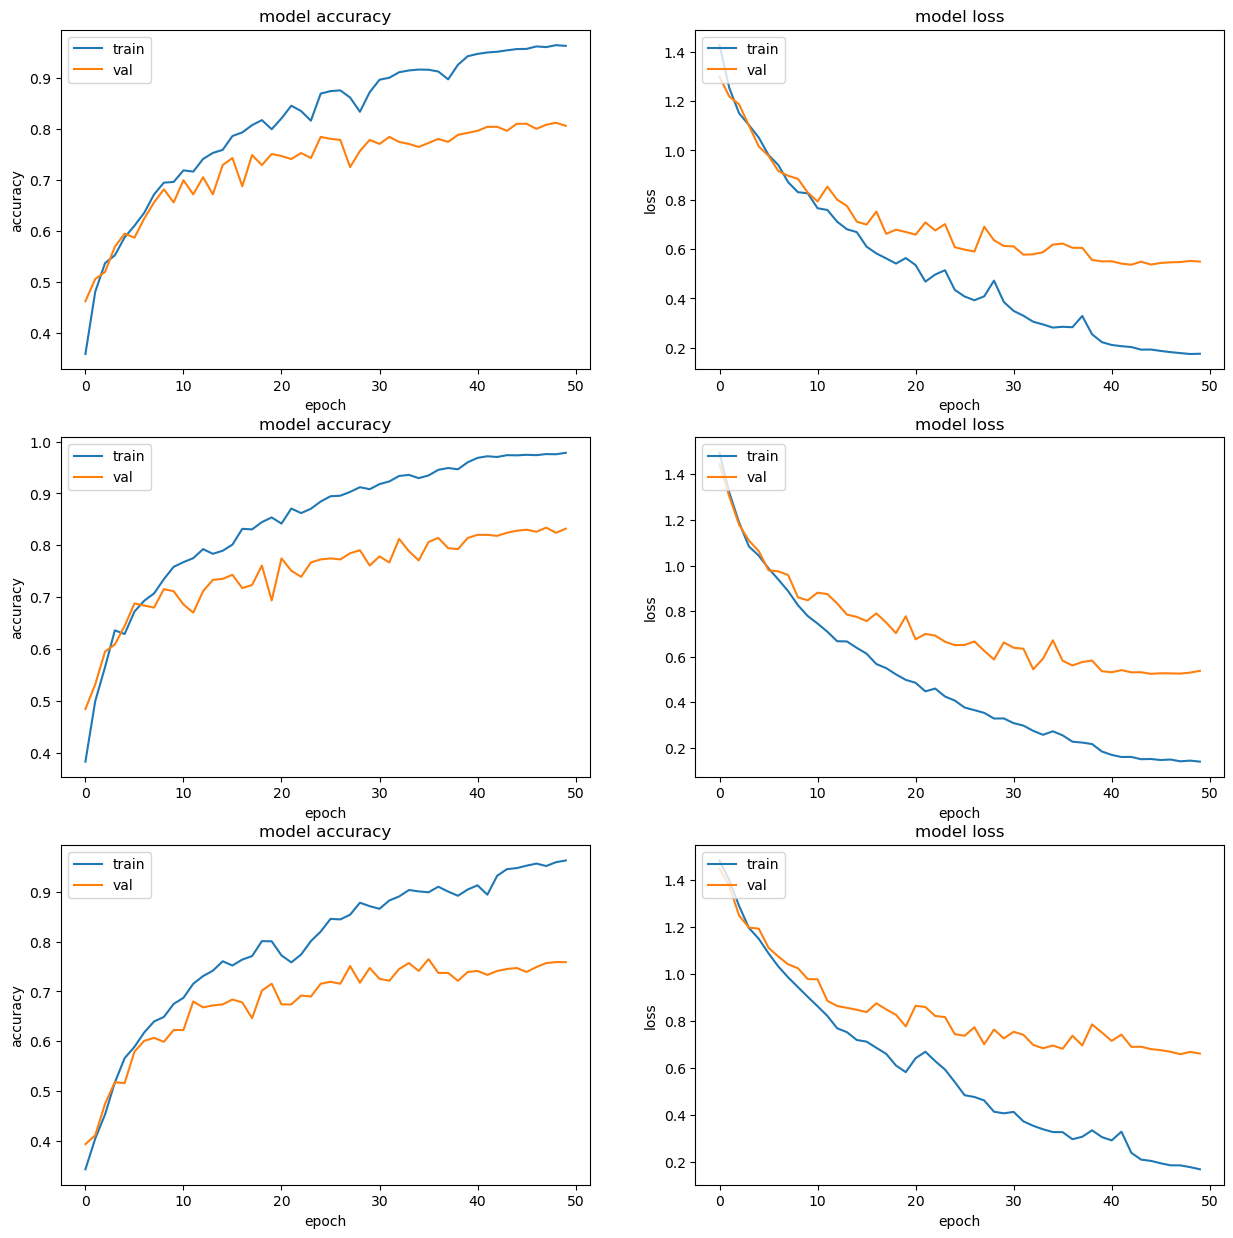

ravdess


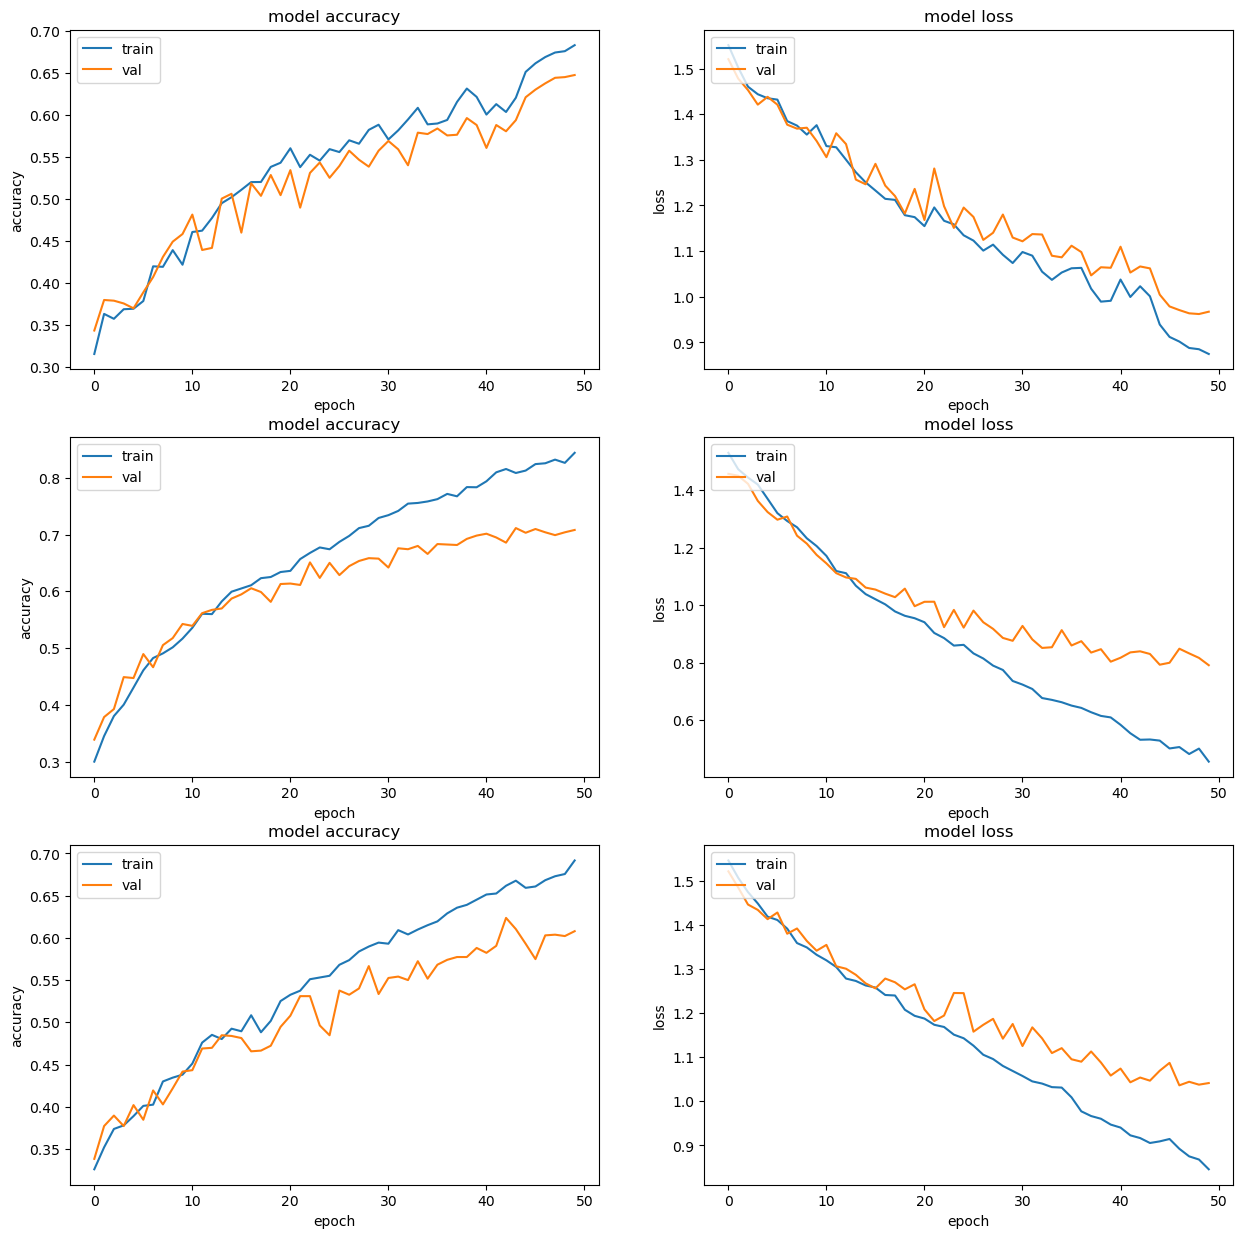


m2
emovo


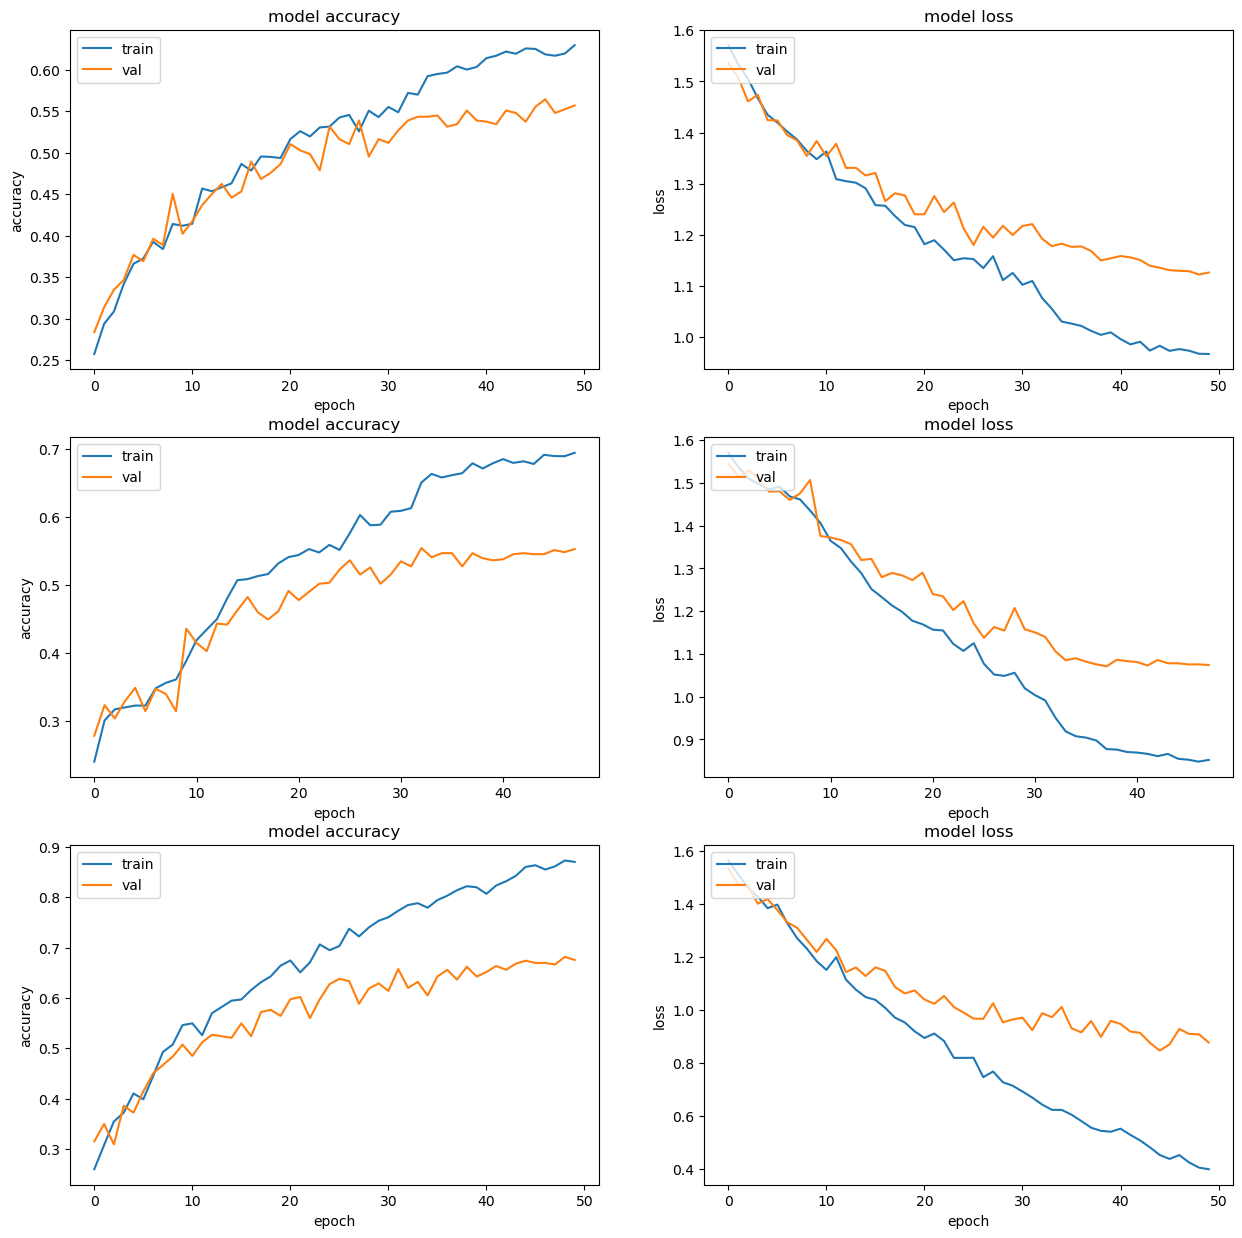

emodb


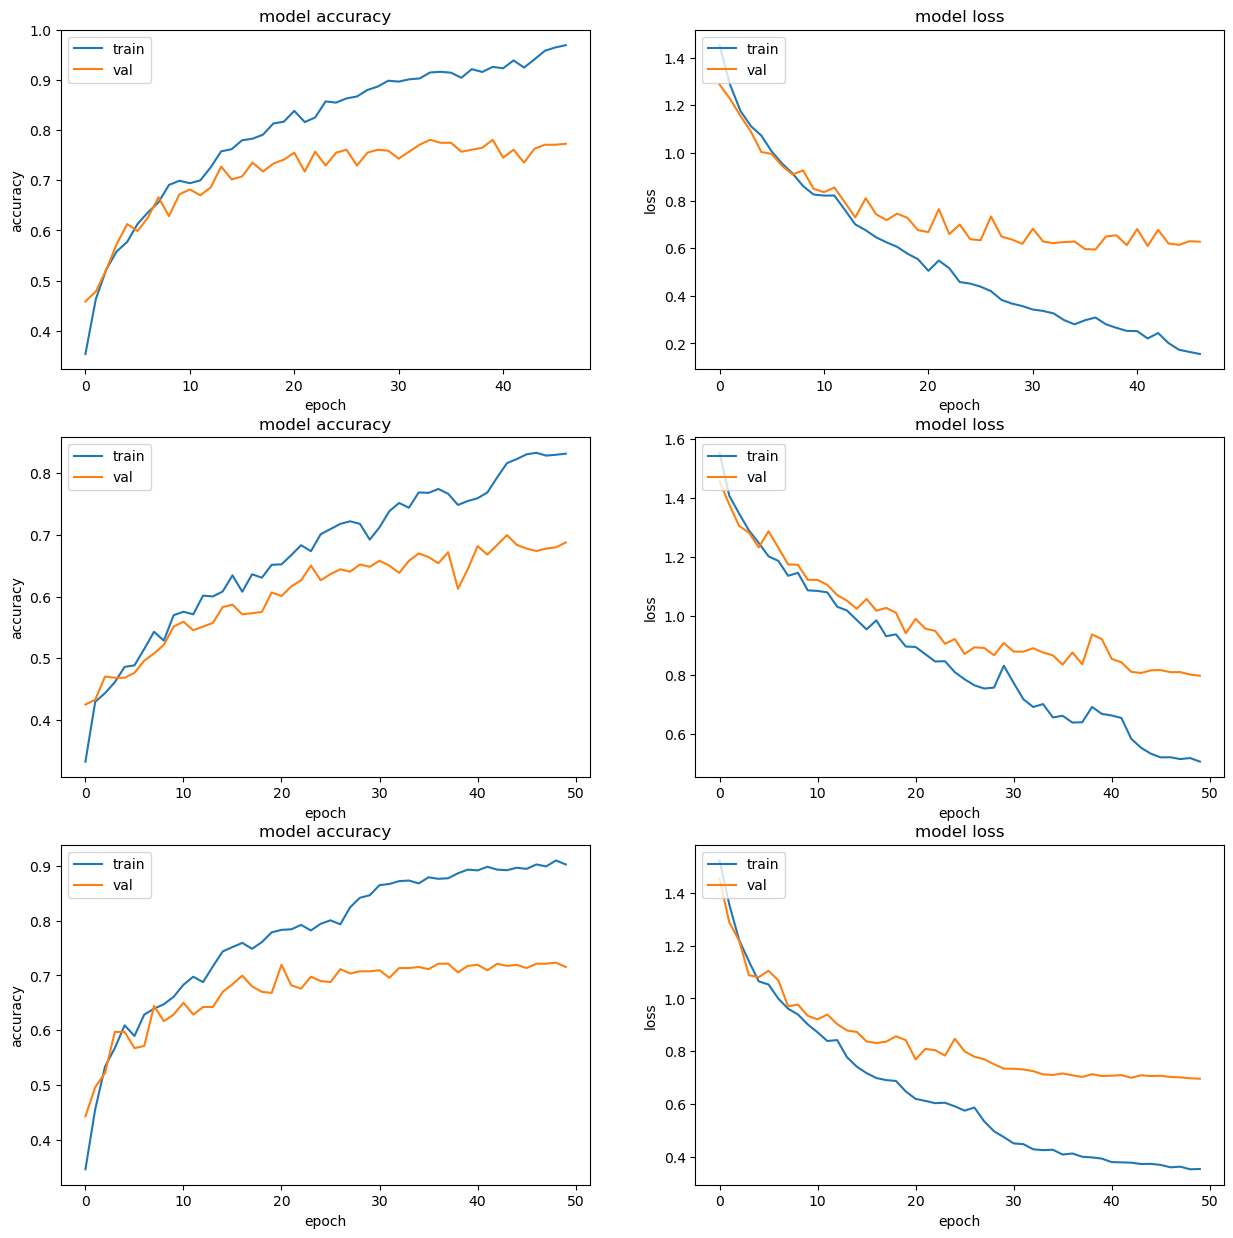

ravdess


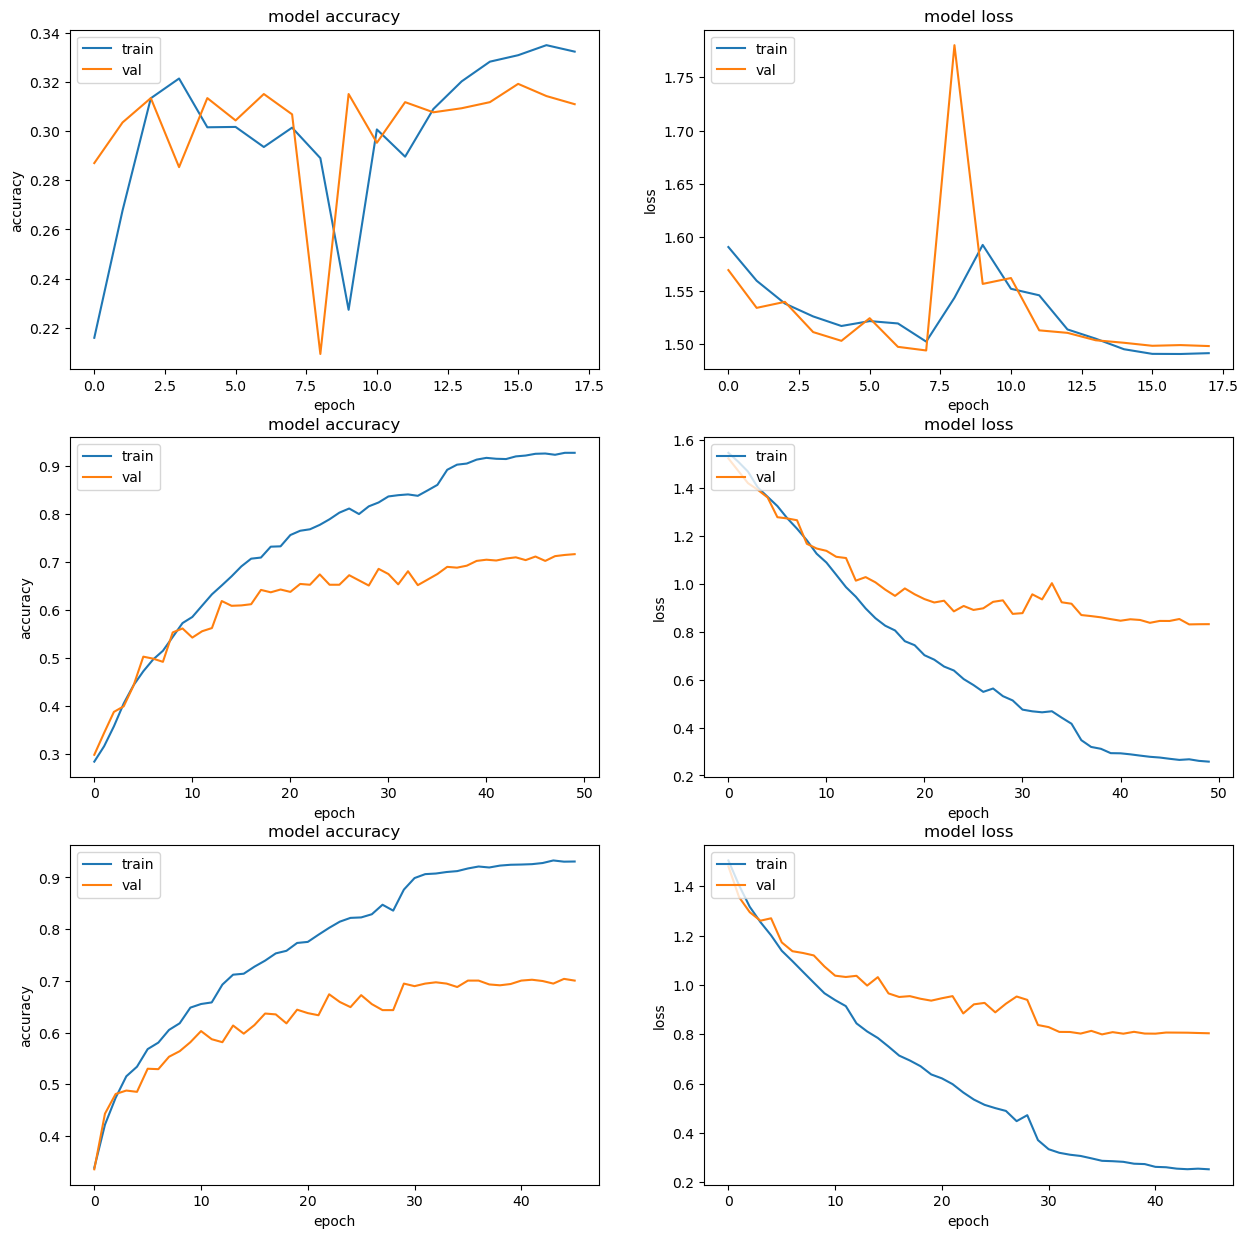


m3
emovo


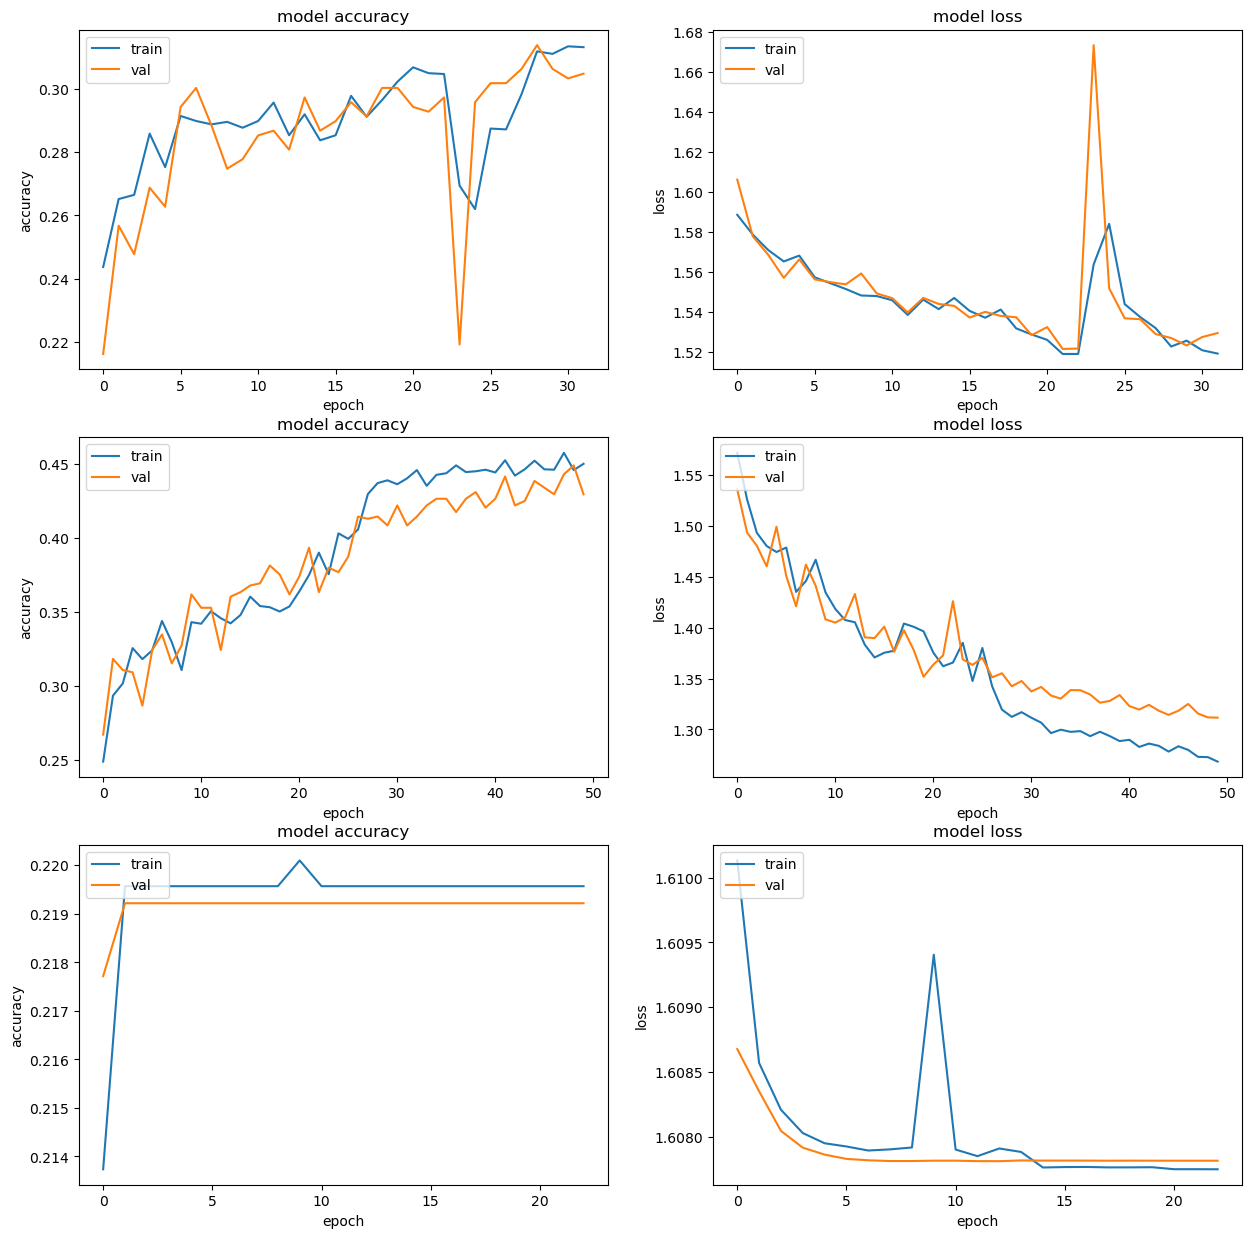

emodb


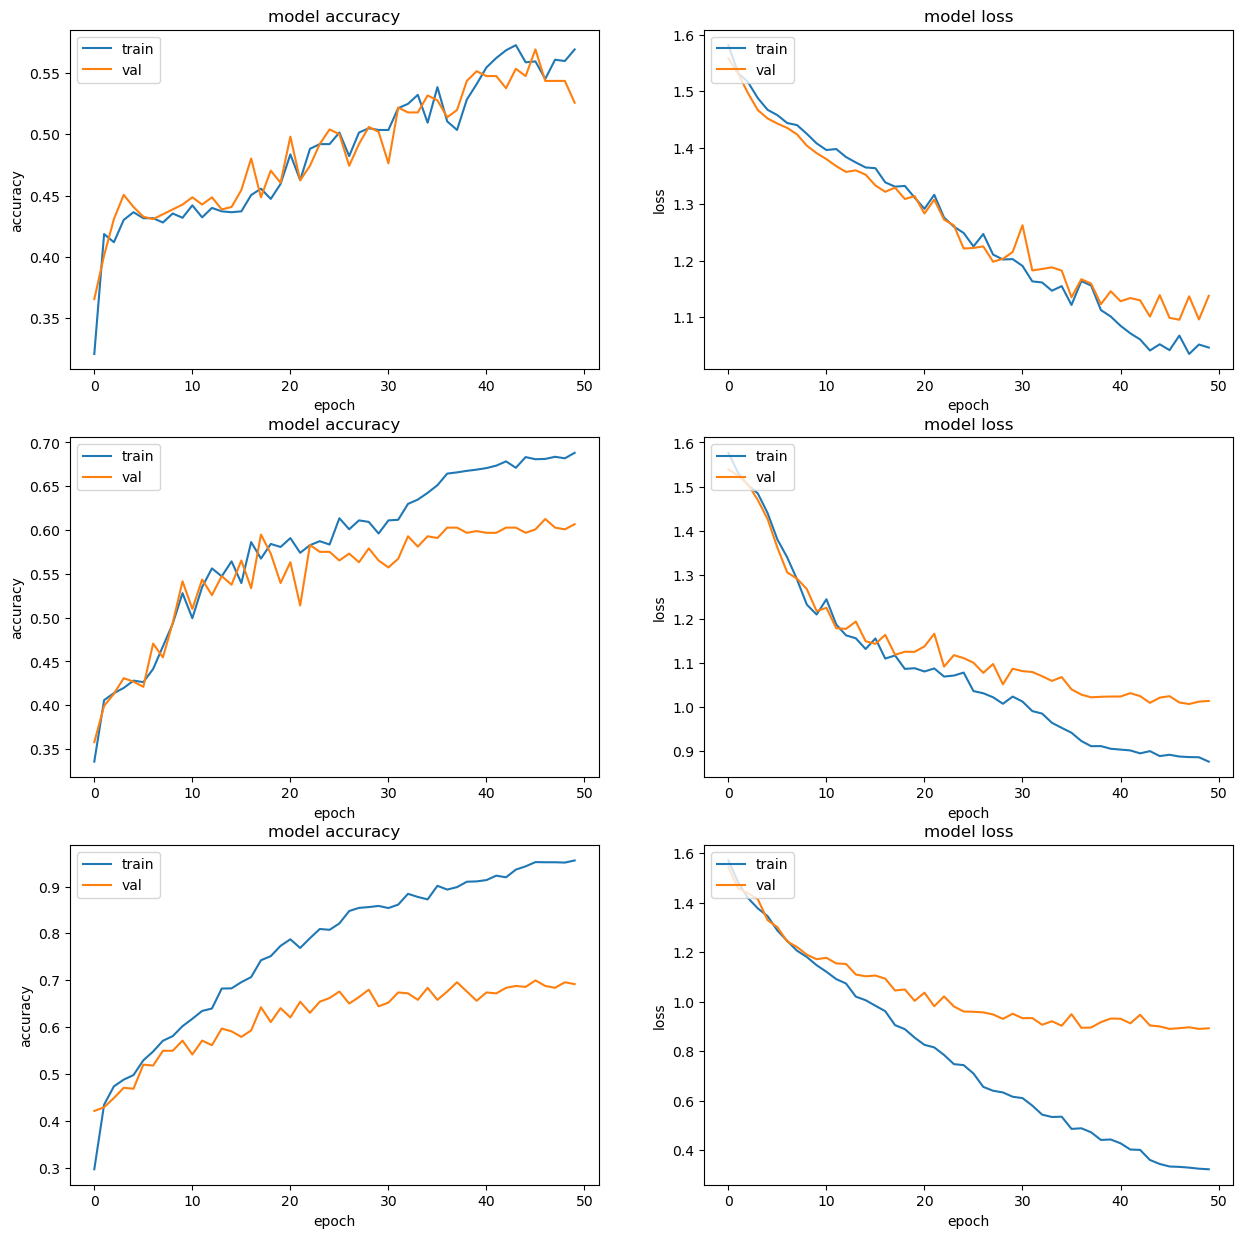

ravdess


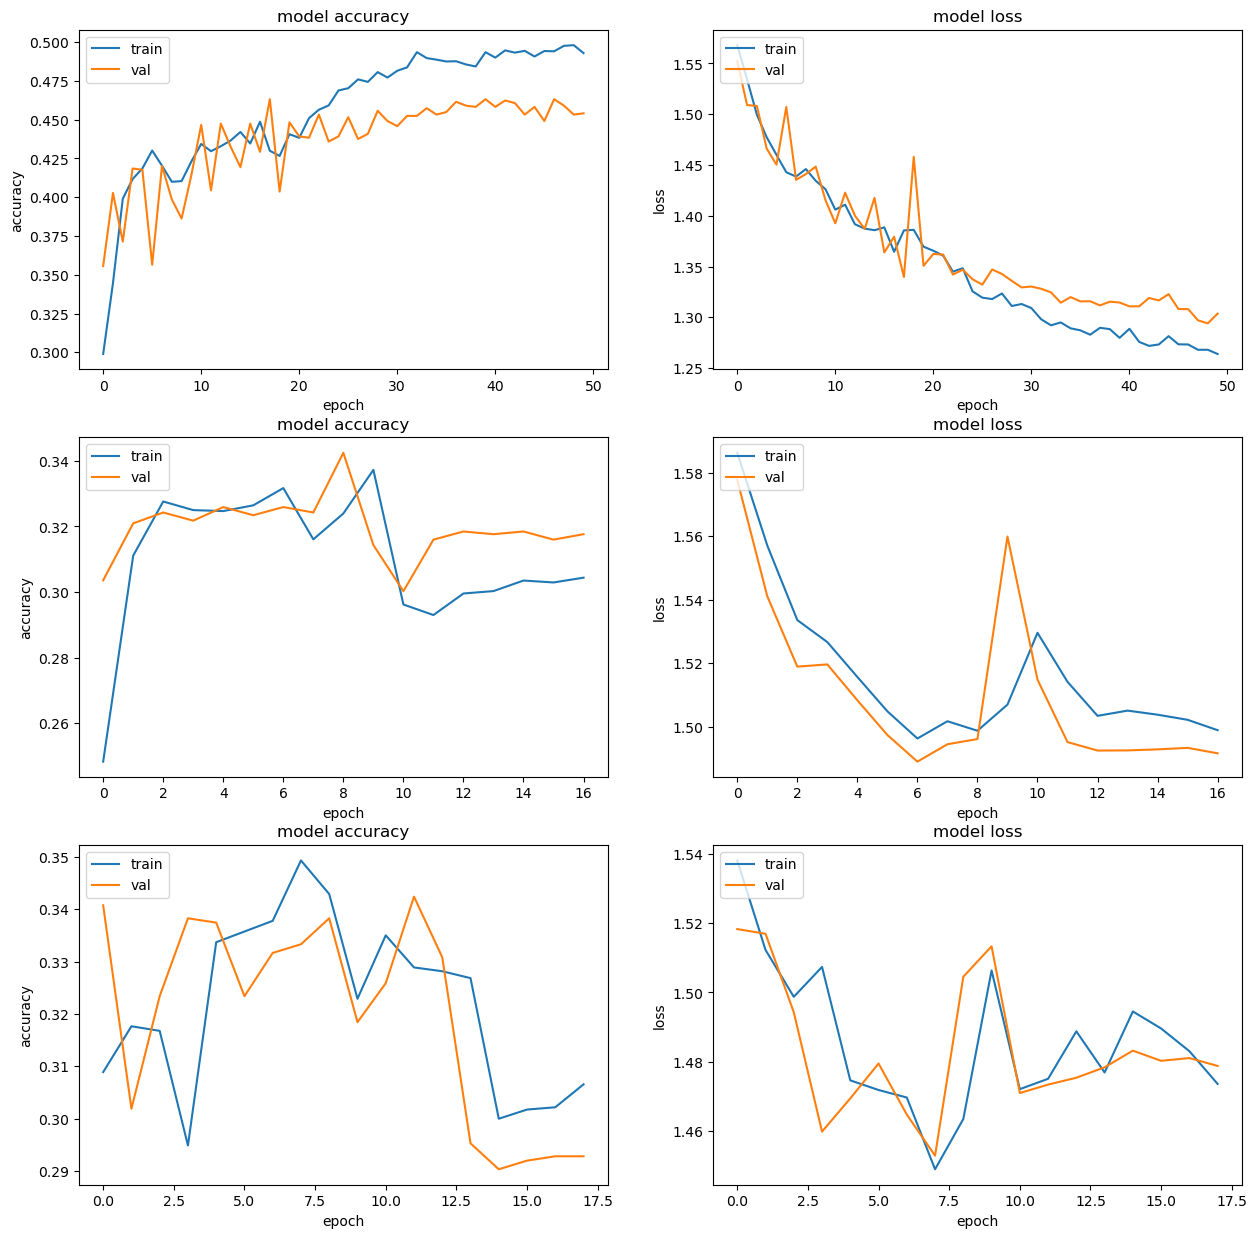


m4
emovo


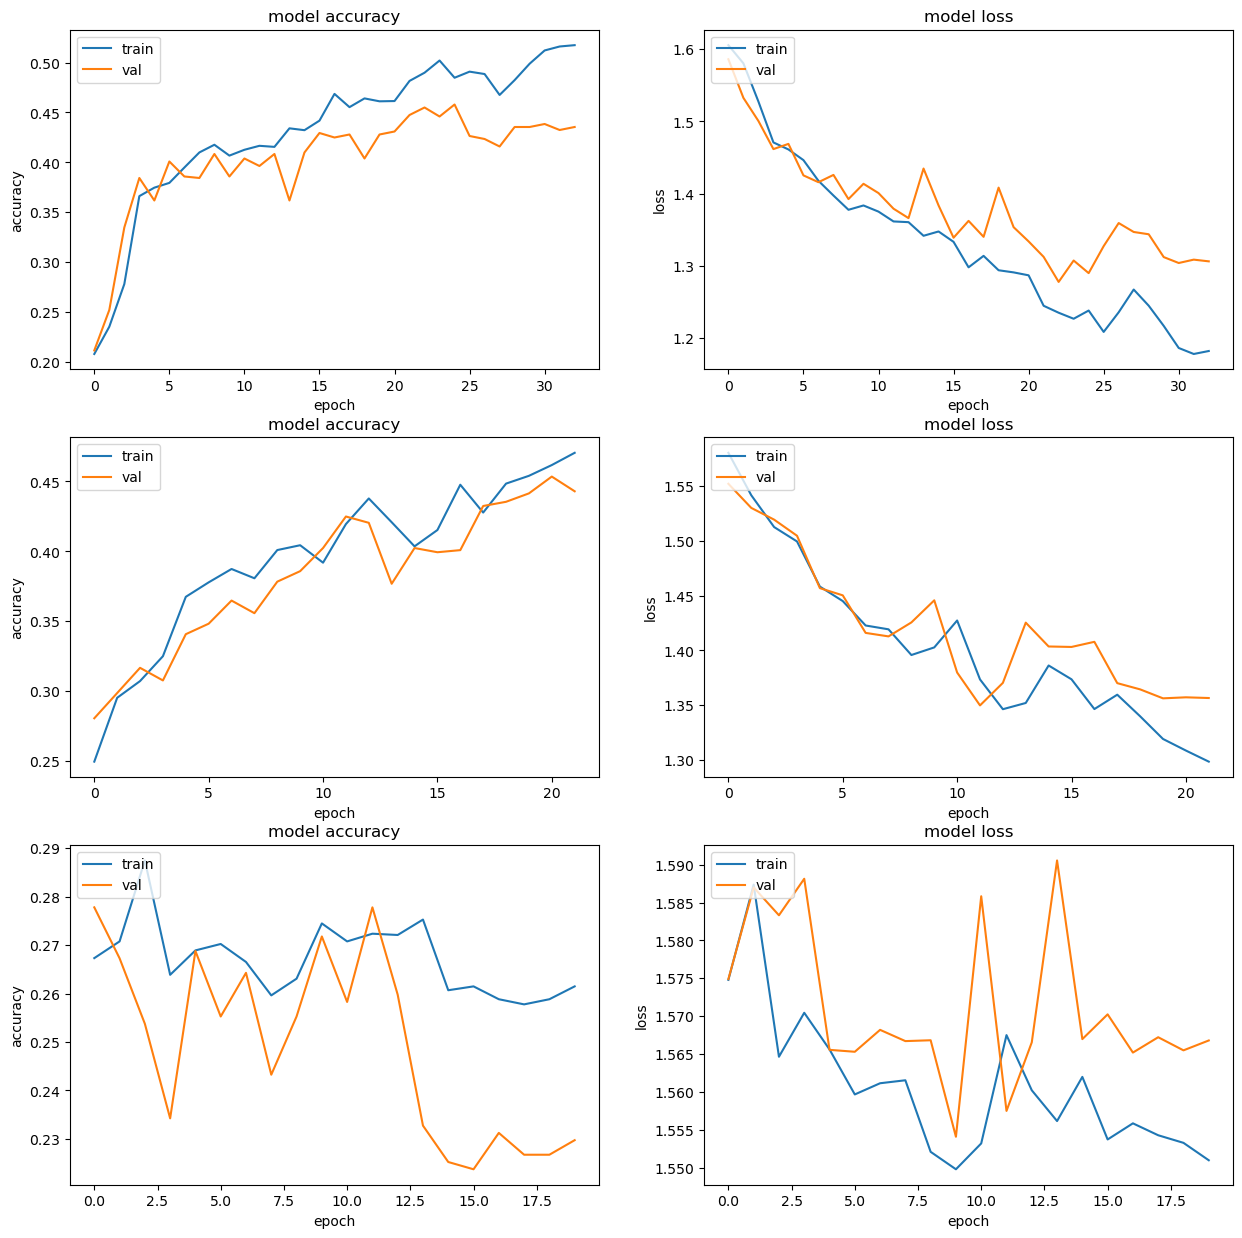

emodb


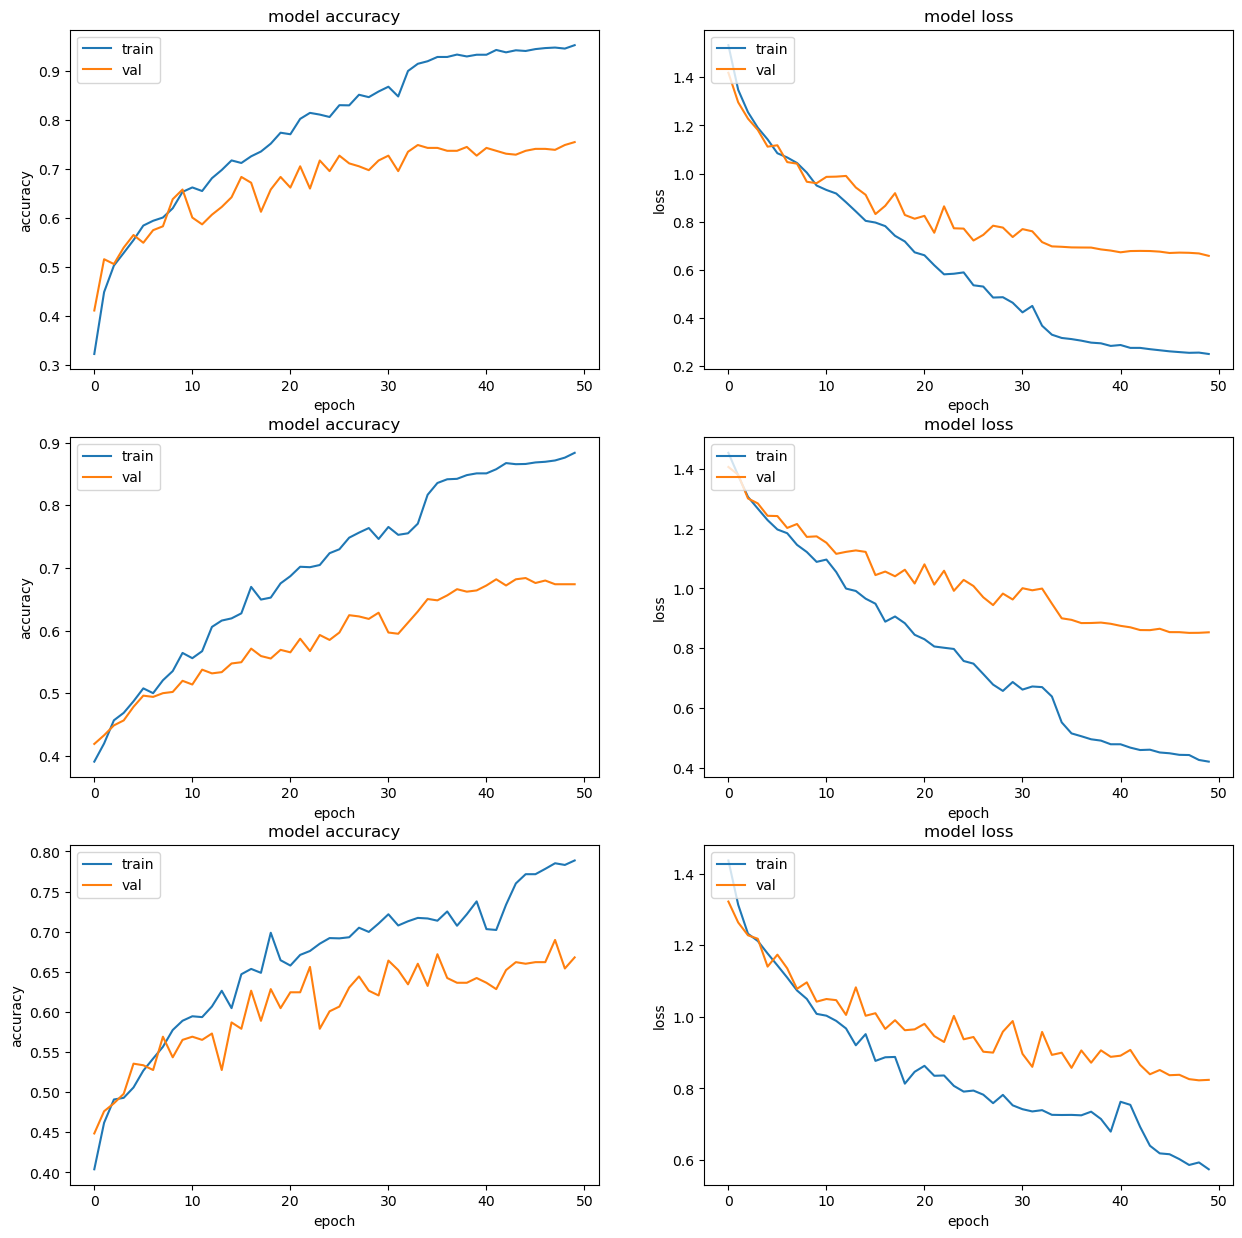

ravdess


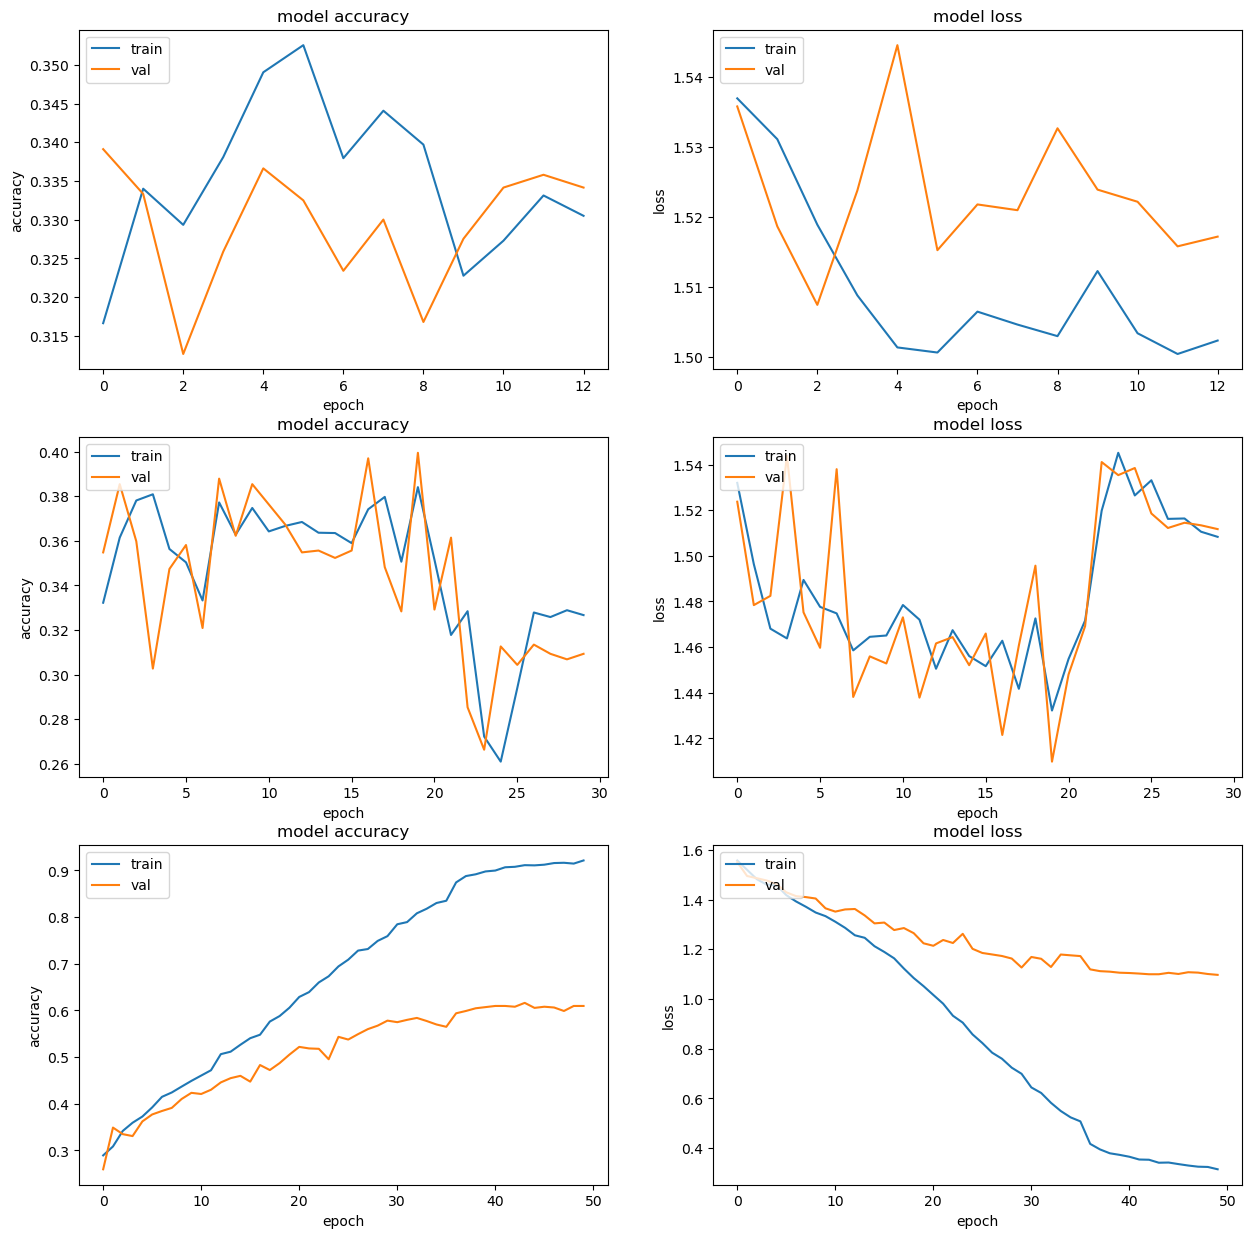


m5
emovo


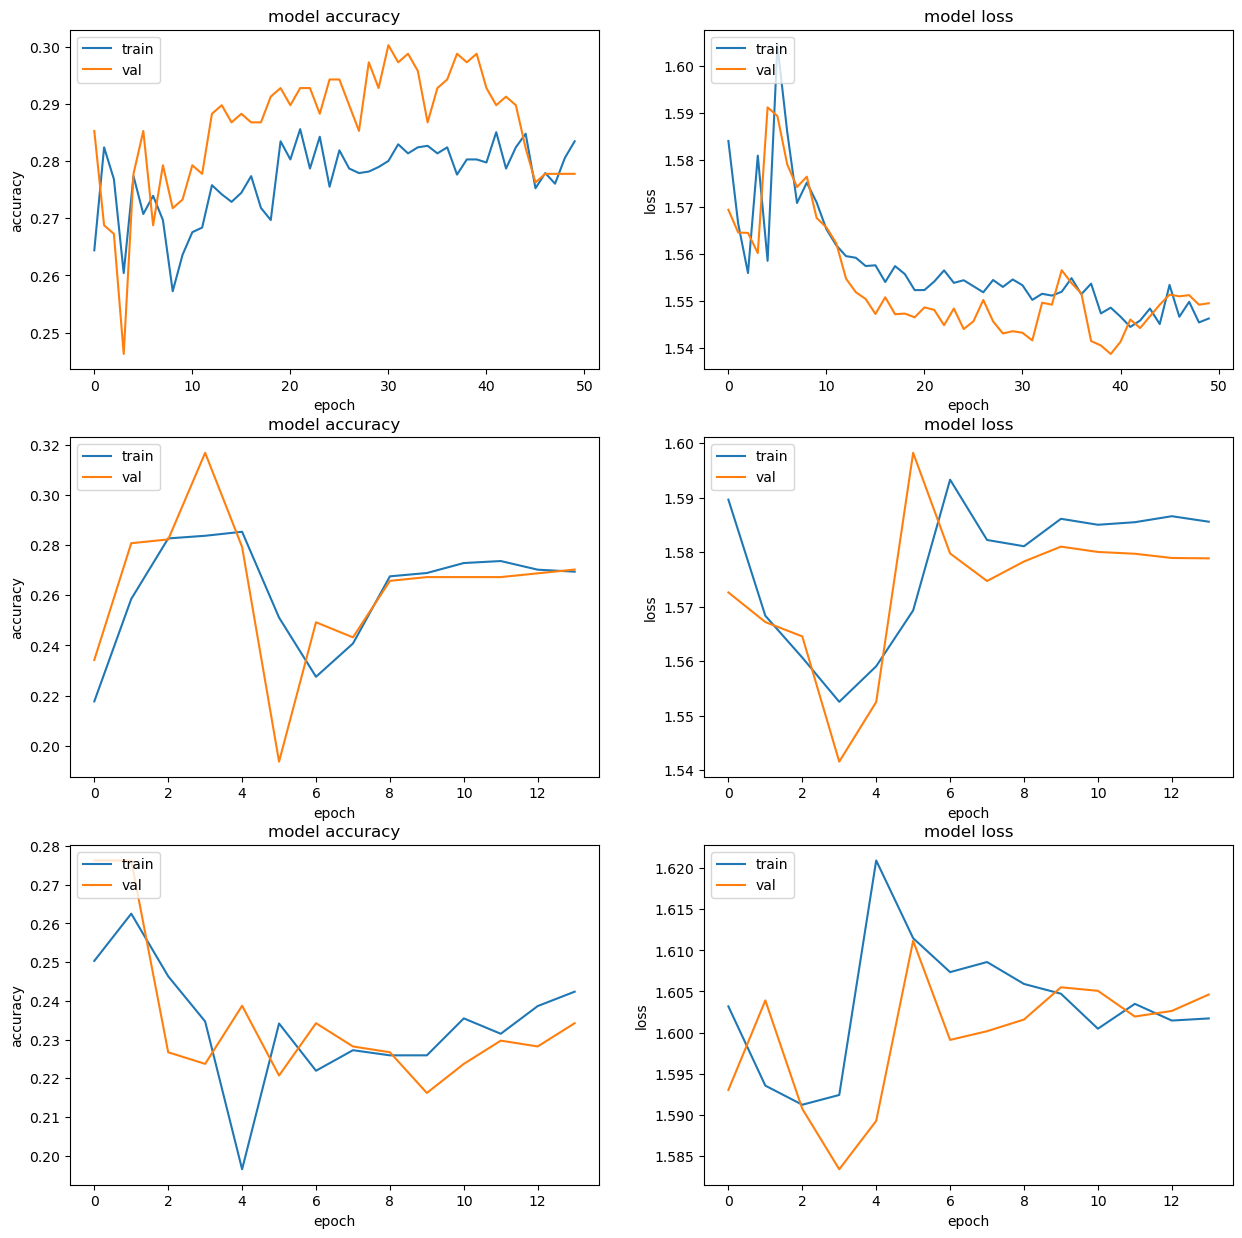

emodb


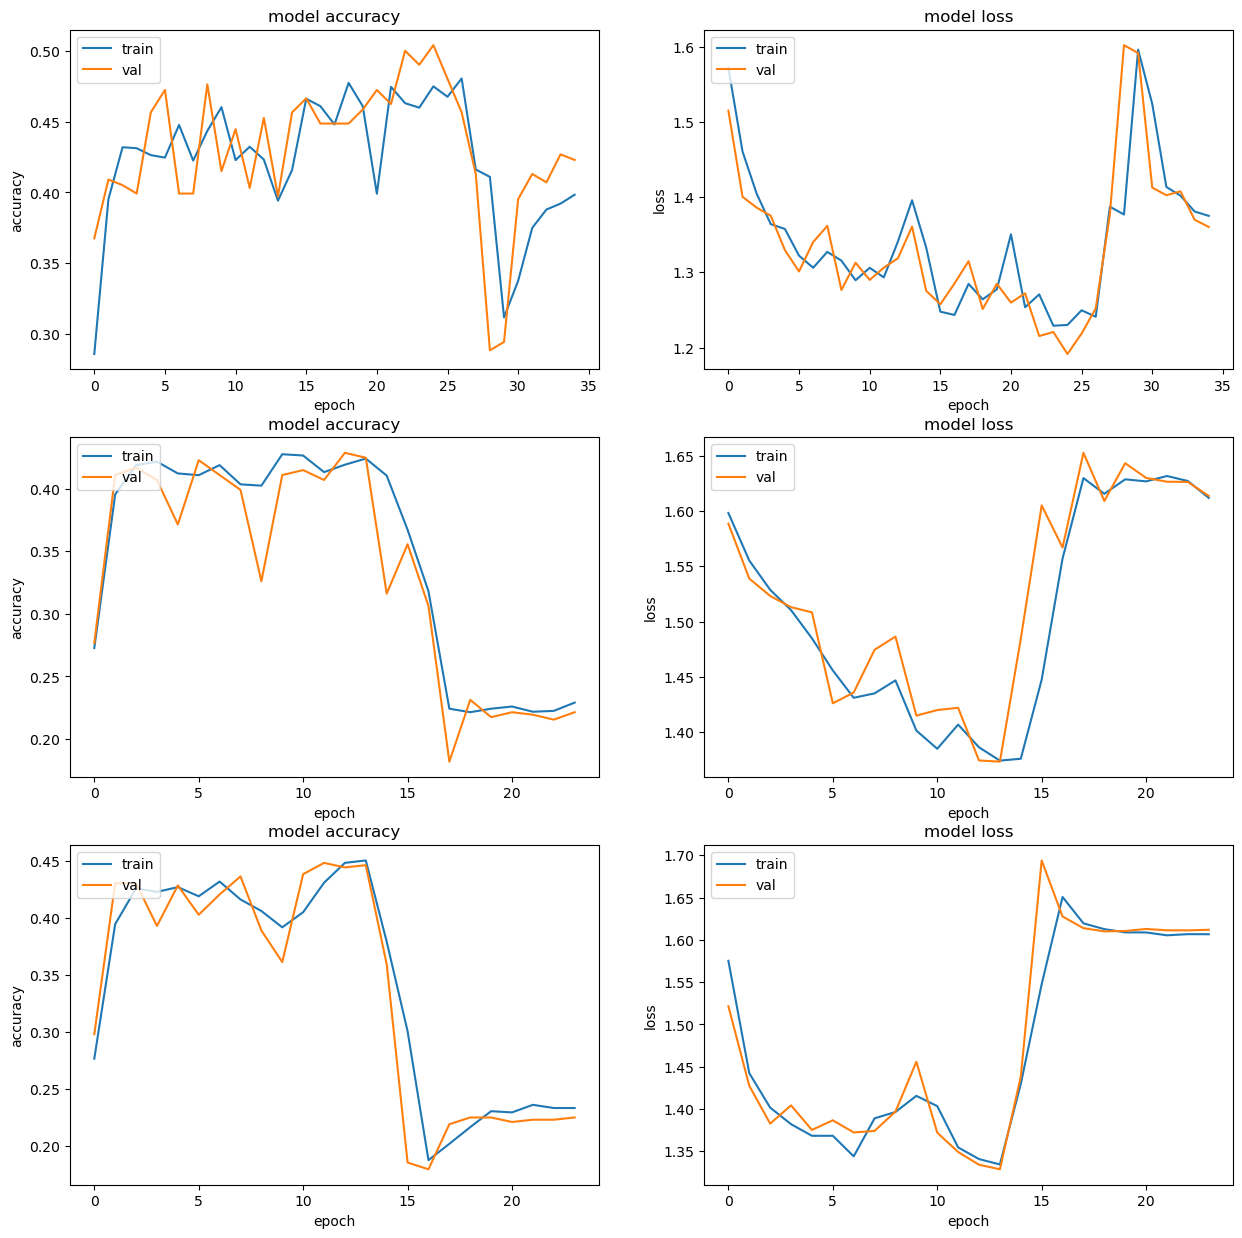

ravdess


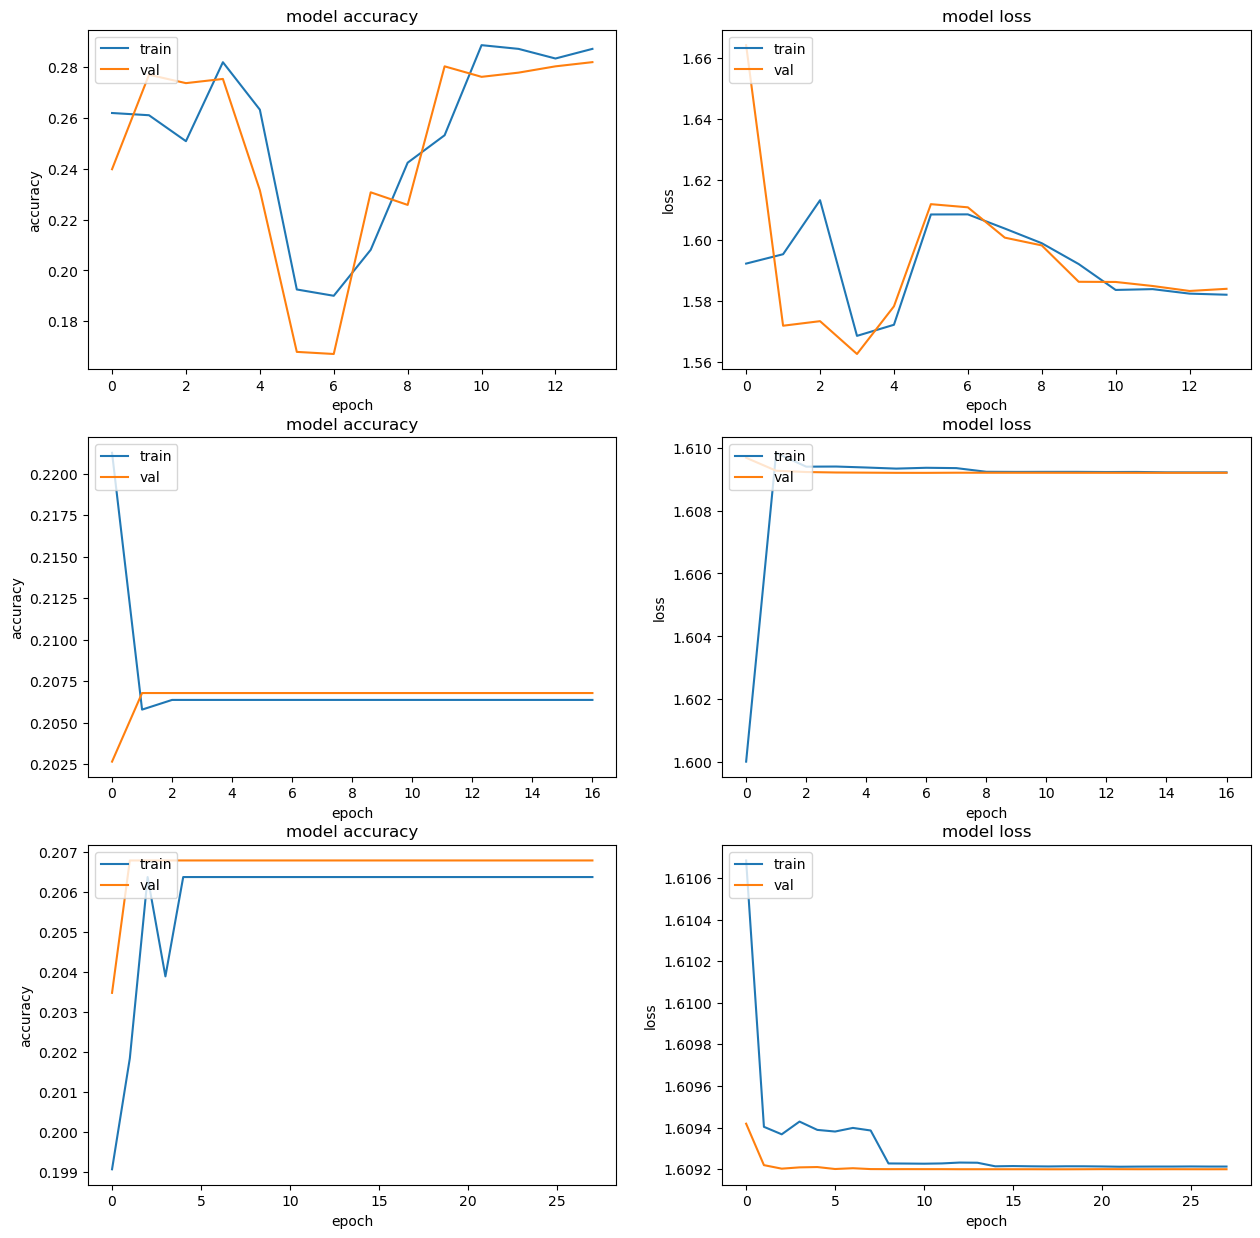


m6
emovo


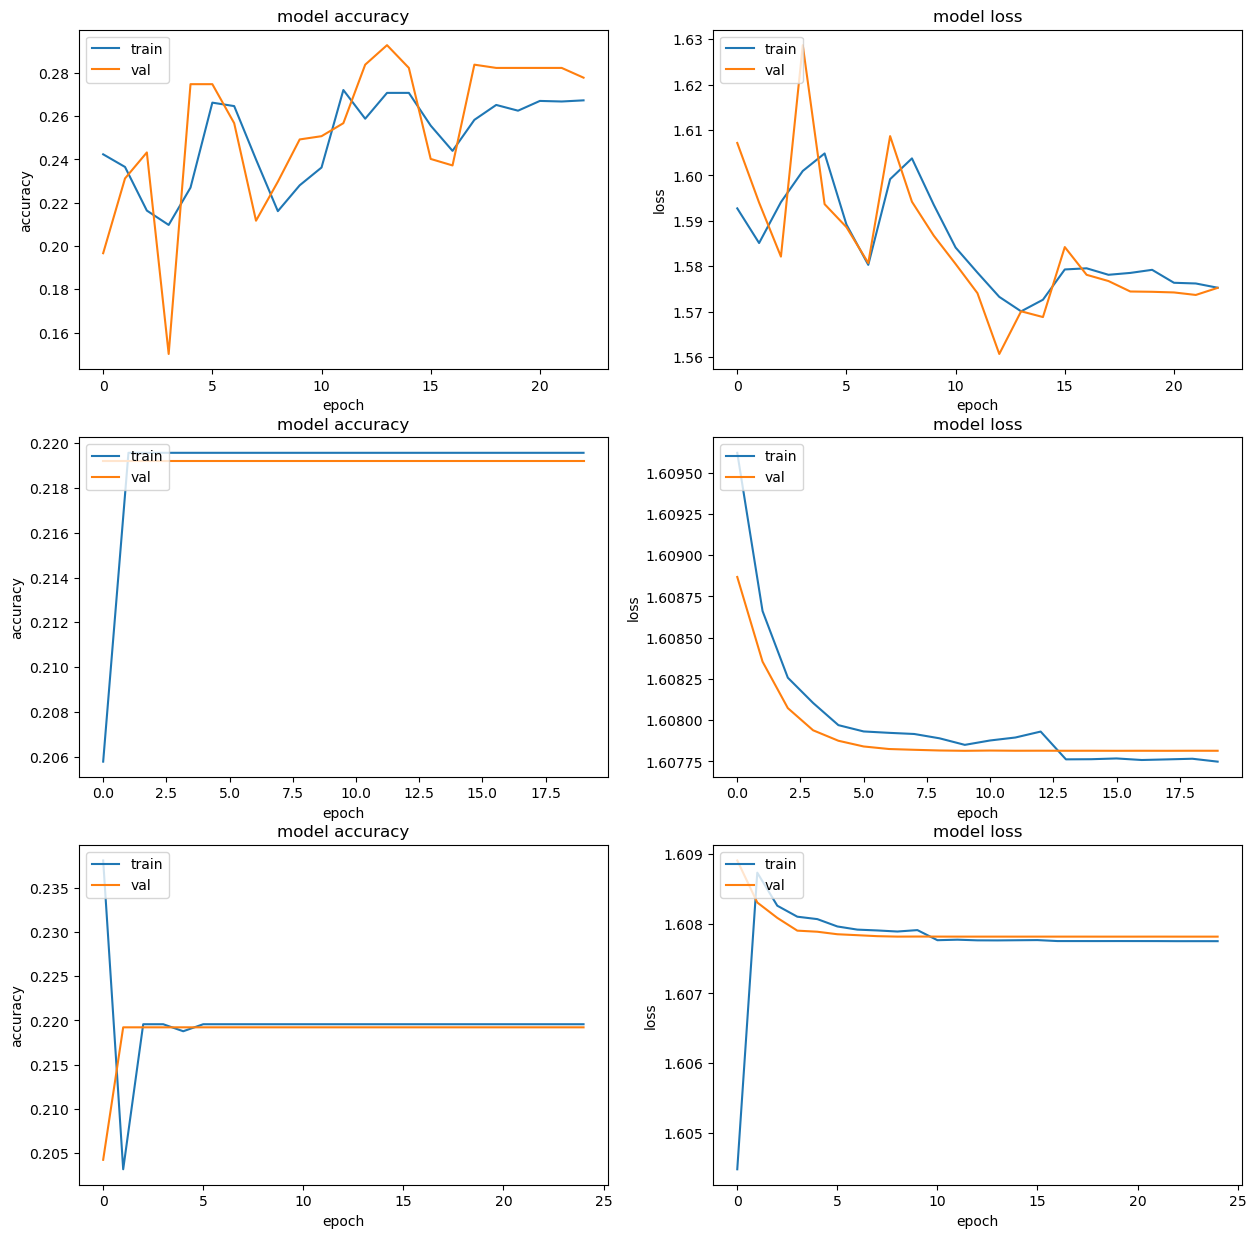

emodb


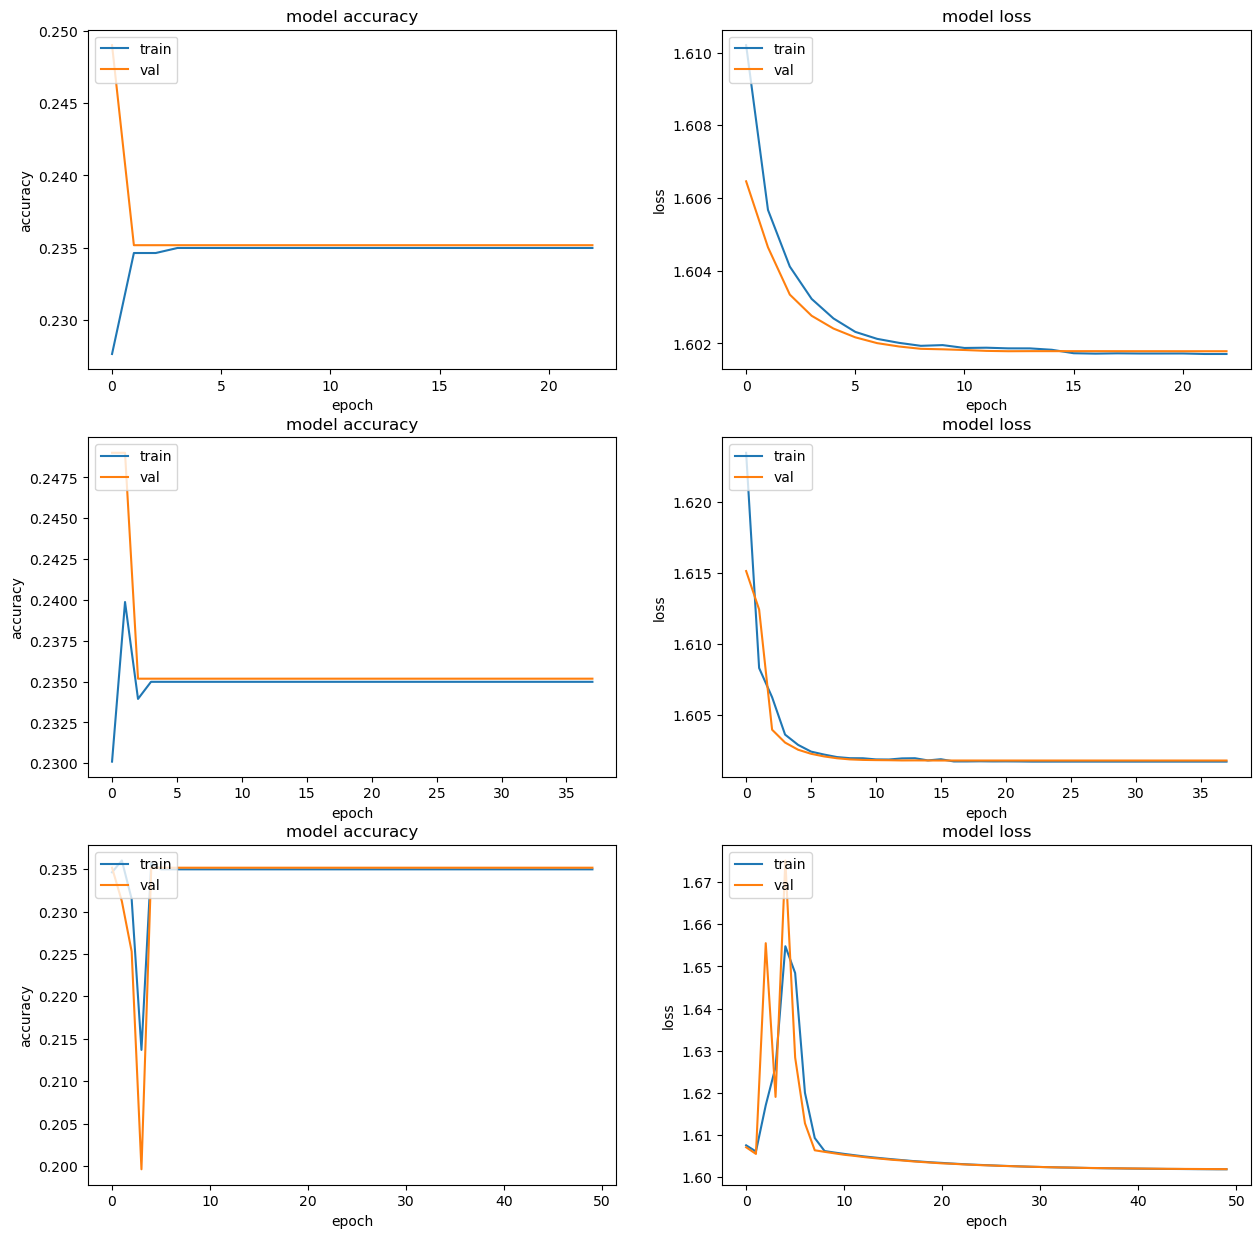

ravdess


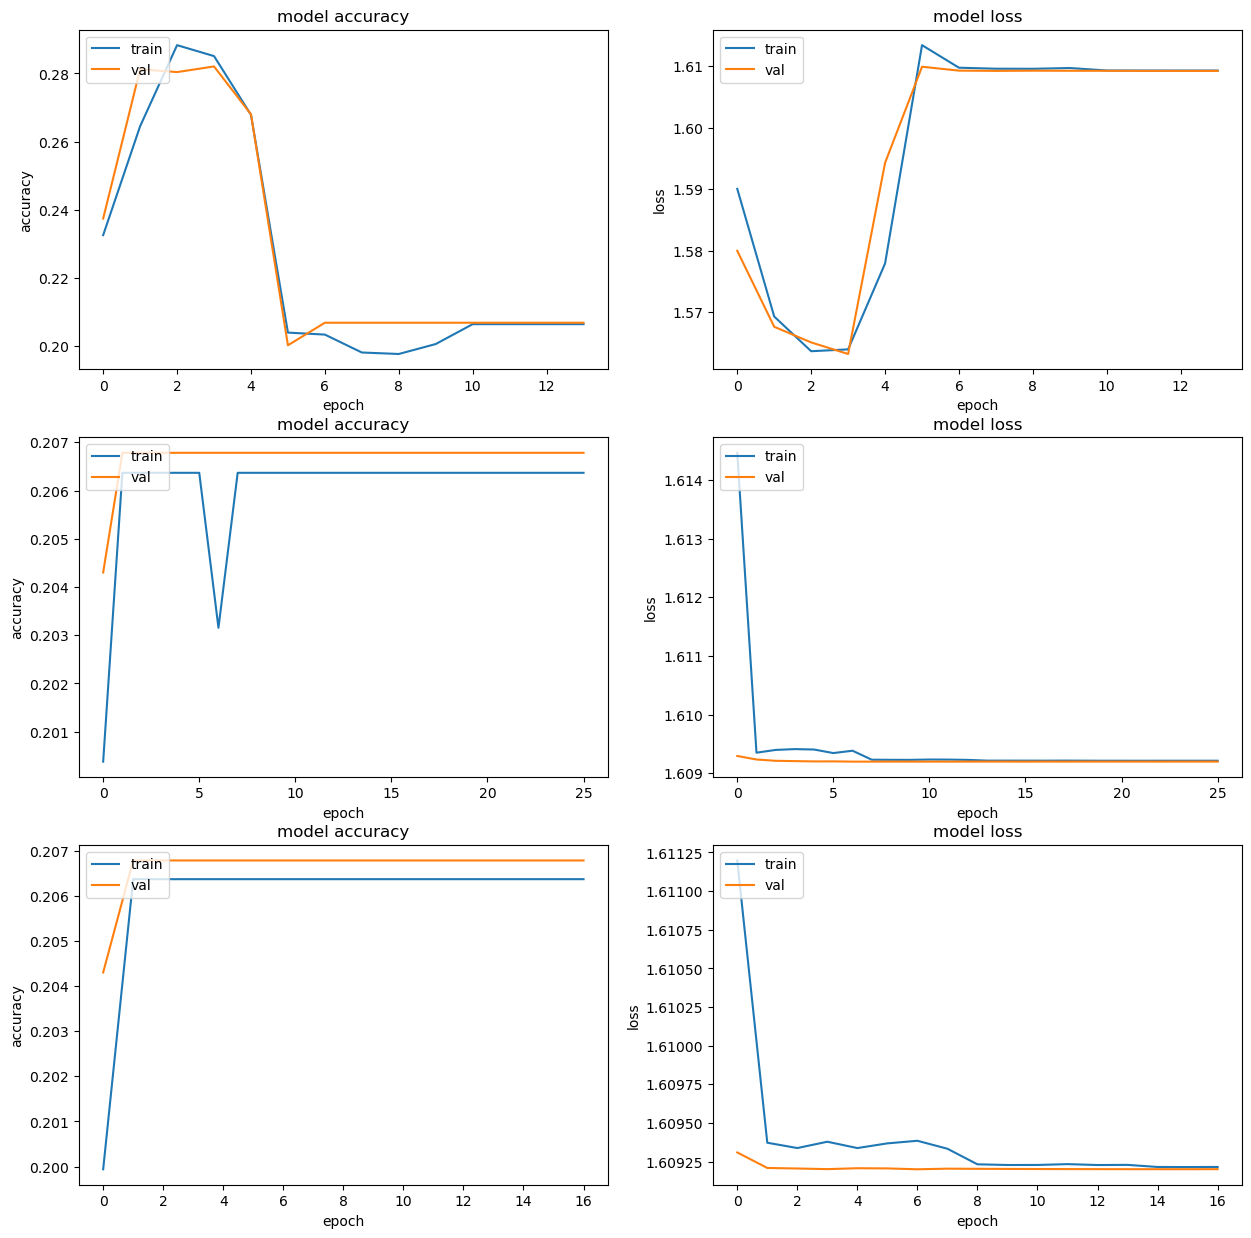

In [21]:
for s in results_arch:
    print(s)
    for d in results_arch[s]:
        print(d)
        plot_stats([p[0] for p in results_arch[s][d]])
    print()